In [3]:
import pm4py
import pandas as pd

In [4]:
from pm4py.objects.conversion.log import converter as log_conv

In [5]:
df = pd.read_csv('./repair2.csv')

In [8]:
df[df['caseID']==1].sort_values(['date','time'])

caseID                taskID originator eventtype contact RepairType  \
5903        1          FirstContact       Dian  complete   Phone        NaN   
11087       1            MakeTicket       Dian     start     NaN        NaN   
4035        1            MakeTicket       Dian  complete     NaN          E   
5098        1         ArrangeSurvey       Dian     start     NaN        NaN   
4561        1         ArrangeSurvey       Dian  complete     NaN        NaN   
9171        1    InformClientSurvey     System  complete     NaN        NaN   
5133        1                Survey      Cindy     start     NaN        NaN   
3835        1                Survey      Cindy  complete     NaN        NaN   
5325        1  SendTicketToFinAdmin     System  complete     NaN        NaN   
3676        1     ReadyInformClient     System  complete     NaN        NaN   
12047       1           TicketReady     System  complete     NaN        NaN   
4078        1          InternRepair       John     start     NaN        NaN   
1994        1          InternRepair       John  complete     NaN        NaN   
7465        1           RepairReady     System  complete     NaN        NaN   

       objectKey RepairInternally  EstimatedRepairTime  RepairCode RepairOK  \
5903         NaN              NaN                  NaN         NaN      NaN   
11087        NaN              NaN                  NaN         NaN      NaN   
4035      1340.0              NaN                  NaN         NaN      NaN   
5098         NaN              NaN                  NaN         NaN      NaN   
4561         NaN              NaN                  NaN         NaN      NaN   
9171         NaN              NaN                  NaN         NaN      NaN   
5133         NaN              NaN                  NaN         NaN      NaN   
3835         NaN             True                240.0         1.0      NaN   
5325         NaN              NaN                  NaN         NaN      NaN   
3676         NaN              NaN                  NaN         NaN     True   
12047        NaN              NaN                  NaN         NaN      NaN   
4078         NaN              NaN                  NaN         NaN      NaN   
1994         NaN              NaN                  NaN         NaN      NaN   
7465         NaN              NaN                  NaN         NaN     True   

             date   time  
5903   1905-05-23   0:00  
11087  1970-01-02   8:08  
4035   1970-01-02   8:11  
5098   1970-01-02   8:11  
4561   1970-01-02   8:16  
9171   1970-01-02   8:16  
5133   1970-01-11  21:33  
3835   1970-01-11  21:56  
5325   1970-01-17  14:03  
3676   1970-01-17  15:44  
12047  1970-01-17  15:44  
4078   1970-01-17   4:36  
1994   1970-01-17   8:12  
7465   1970-01-17   8:12

In [324]:
df[df['RepairInternally'] == True]

caseID  taskID originator eventtype contact RepairType  objectKey  \
4         852  Survey        Edd  complete     NaN        NaN        NaN   
62        591  Survey       Paul  complete     NaN        NaN        NaN   
76        153  Survey       Anne  complete     NaN        NaN        NaN   
77        452  Survey       Anne  complete     NaN        NaN        NaN   
87        851  Survey        Lex  complete     NaN        NaN        NaN   
...       ...     ...        ...       ...     ...        ...        ...   
13199     273  Survey      Jacky  complete     NaN        NaN        NaN   
13208     860  Survey      Jacky  complete     NaN        NaN        NaN   
13229     865  Survey      Cindy  complete     NaN        NaN        NaN   
13231      59  Survey       Anne  complete     NaN        NaN        NaN   
13233     118  Survey      Jacky  complete     NaN        NaN        NaN   

      RepairInternally  EstimatedRepairTime  RepairCode RepairOK        date  \
4                 True                240.0         1.0      NaN  2020-01-10   
62                True                240.0         1.0      NaN  2020-03-08   
76                True                120.0         3.0      NaN  2020-03-22   
77                True                120.0         1.0      NaN  2020-03-23   
87                True                240.0         2.0      NaN  2020-04-02   
...                ...                  ...         ...      ...         ...   
13199             True                120.0         1.0      NaN  1970-01-11   
13208             True                120.0         3.0      NaN  1970-01-13   
13229             True                240.0         1.0      NaN  1970-01-05   
13231             True                120.0         1.0      NaN  1970-01-14   
13233             True                120.0         1.0      NaN  1970-01-07   

        time  
4      11:33  
62     22:38  
76      3:43  
77     18:52  
87     17:03  
...      ...  
13199  21:53  
13208  18:52  
13229  17:45  
13231   6:40  
13233   5:05  

[868 rows x 13 columns]

In [322]:
df.isnull().sum()

caseID                     0
taskID                     2
originator                 2
eventtype                  5
contact                12262
RepairType             12335
objectKey              12335
RepairInternally       12335
EstimatedRepairTime    12335
RepairCode             12335
RepairOK               11408
date                      13
time                      13
dtype: int64

In [290]:
import pandas as pd
import pm4py

tp = pd.DataFrame()
dataframe = pd.read_csv('./repair2.csv')

temp = [str(i).split(':') for i in dataframe['time']]
minutes = []
for time in temp:
    i = 0
    if len(time) != 2:
        minutes.append(0)
        continue    
    i += int(time[0]) * 60 + int(time[1])
    minutes.append(i)

dataframe['minutes'] = minutes
    
    
for i in range(1,1001):
    #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
    merterial = merterial.groupby('caseID').get_group(i)
    merterial = merterial.sort_values('date')
    merterial['contact'] = merterial['contact'].fillna('ZZ')
    change = sorted(list(set(merterial['contact'])))
    merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
    if len(change) == 1:
        print(i)
    
    tp = pd.concat([tp,merterial])

180
245


In [292]:
print(pd.DataFrame(df['RepairCode']).value_counts())
print(pd.DataFrame(df['RepairType']).value_counts())
print(pd.DataFrame(df['contact']).value_counts())

RepairCode
1.0           550
2.0           224
3.0            94
4.0            59
dtype: int64
RepairType
P             439
E             370
B             118
dtype: int64
contact 
Phone       270
Web         265
Personal    240
Letter      225
dtype: int64


In [309]:
tp = tp[tp['contact'] != 'ZZ']

In [310]:
tp = tp[tp['date'] > '1960-01-01']

In [311]:
tp[tp['date'] < '2010-01-01']

caseID              taskID originator eventtype contact RepairType  \
1        1          MakeTicket       Dian  complete   Phone          E   
2        1       ArrangeSurvey       Dian  complete   Phone        NaN   
3        1       ArrangeSurvey       Dian     start   Phone        NaN   
4        1  InformClientSurvey     System  complete   Phone        NaN   
5        1          MakeTicket       Dian     start   Phone        NaN   
..     ...                 ...        ...       ...     ...        ...   
48    1000         RepairReady     System  complete     Web        NaN   
49    1000        InternRepair       John  complete     Web        NaN   
50    1000        InternRepair       John     start     Web        NaN   
51    1000   ReadyInformClient     System  complete     Web        NaN   
52    1000         TicketReady     System  complete     Web        NaN   

    objectKey RepairInternally  EstimatedRepairTime  RepairCode RepairOK  \
1      1340.0              NaN                  NaN         NaN      NaN   
2         NaN              NaN                  NaN         NaN      NaN   
3         NaN              NaN                  NaN         NaN      NaN   
4         NaN              NaN                  NaN         NaN      NaN   
5         NaN              NaN                  NaN         NaN      NaN   
..        ...              ...                  ...         ...      ...   
48        NaN              NaN                  NaN         NaN     True   
49        NaN              NaN                  NaN         NaN      NaN   
50        NaN              NaN                  NaN         NaN      NaN   
51        NaN              NaN                  NaN         NaN     True   
52        NaN              NaN                  NaN         NaN      NaN   

                        date                      time  minutes  \
1  1970-01-02 00:00:00+00:00 2022-09-13 08:11:00+00:00      491   
2  1970-01-02 00:00:00+00:00 2022-09-13 08:16:00+00:00      496   
3  1970-01-02 00:00:00+00:00 2022-09-13 08:11:00+00:00      491   
4  1970-01-02 00:00:00+00:00 2022-09-13 08:16:00+00:00      496   
5  1970-01-02 00:00:00+00:00 2022-09-13 08:08:00+00:00      488   
..                       ...                       ...      ...   
48 1970-01-19 00:00:00+00:00 2022-09-13 18:34:00+00:00     1114   
49 1970-01-19 00:00:00+00:00 2022-09-13 18:34:00+00:00     1114   
50 1970-01-19 00:00:00+00:00 2022-09-13 14:34:00+00:00      874   
51 1970-01-20 00:00:00+00:00 2022-09-13 02:25:00+00:00      145   
52 1970-01-20 00:00:00+00:00 2022-09-13 02:25:00+00:00      145   

   case:concept:name        concept:name            time:timestamp  @@index  
1                  1          MakeTicket 1970-01-02 00:00:00+00:00        1  
2                  1       ArrangeSurvey 1970-01-02 00:00:00+00:00        2  
3                  1       ArrangeSurvey 1970-01-02 00:00:00+00:00        3  
4                  1  InformClientSurvey 1970-01-02 00:00:00+00:00        4  
5                  1          MakeTicket 1970-01-02 00:00:00+00:00        5  
..               ...                 ...                       ...      ...  
48              1000         RepairReady 1970-01-19 00:00:00+00:00       48  
49              1000        InternRepair 1970-01-19 00:00:00+00:00       49  
50              1000        InternRepair 1970-01-19 00:00:00+00:00       50  
51              1000   ReadyInformClient 1970-01-20 00:00:00+00:00       51  
52              1000         TicketReady 1970-01-20 00:00:00+00:00       52  

[12357 rows x 18 columns]

In [316]:
tp[tp['contact'] == 'Web']


caseID                  taskID originator eventtype contact RepairType  \
477      13            FirstContact     Monica  complete     Web        NaN   
478      13  InformClientWrongPlace     Monica  complete     Web        NaN   
884      16              MakeTicket       Dian     start     Web        NaN   
885      16           ArrangeSurvey       Dian  complete     Web        NaN   
886      16           ArrangeSurvey       Dian     start     Web        NaN   
..      ...                     ...        ...       ...     ...        ...   
49     1000            InternRepair       John  complete     Web        NaN   
50     1000            InternRepair       John     start     Web        NaN   
51     1000       ReadyInformClient     System  complete     Web        NaN   
52     1000             TicketReady     System  complete     Web        NaN   
53     1000    SendTicketToFinAdmin     System  complete     Web        NaN   

     objectKey RepairInternally  EstimatedRepairTime  RepairCode RepairOK  \
477        NaN              NaN                  NaN         NaN      NaN   
478        NaN              NaN                  NaN         NaN      NaN   
884        NaN              NaN                  NaN         NaN      NaN   
885        NaN              NaN                  NaN         NaN      NaN   
886        NaN              NaN                  NaN         NaN      NaN   
..         ...              ...                  ...         ...      ...   
49         NaN              NaN                  NaN         NaN      NaN   
50         NaN              NaN                  NaN         NaN      NaN   
51         NaN              NaN                  NaN         NaN     True   
52         NaN              NaN                  NaN         NaN      NaN   
53         NaN              NaN                  NaN         NaN      NaN   

                         date                      time  minutes  \
477 1970-01-02 00:00:00+00:00 2022-09-13 12:22:00+00:00      742   
478 1970-01-02 00:00:00+00:00 2022-09-13 12:22:00+00:00      742   
884 1970-01-08 00:00:00+00:00 2022-09-13 03:54:00+00:00      234   
885 1970-01-08 00:00:00+00:00 2022-09-13 14:50:00+00:00      890   
886 1970-01-08 00:00:00+00:00 2022-09-13 03:57:00+00:00      237   
..                        ...                       ...      ...   
49  1970-01-19 00:00:00+00:00 2022-09-13 18:34:00+00:00     1114   
50  1970-01-19 00:00:00+00:00 2022-09-13 14:34:00+00:00      874   
51  1970-01-20 00:00:00+00:00 2022-09-13 02:25:00+00:00      145   
52  1970-01-20 00:00:00+00:00 2022-09-13 02:25:00+00:00      145   
53  2022-01-23 00:00:00+00:00 2022-09-13 01:11:00+00:00       71   

    case:concept:name            concept:name            time:timestamp  \
477                13            FirstContact 1970-01-02 00:00:00+00:00   
478                13  InformClientWrongPlace 1970-01-02 00:00:00+00:00   
884                16              MakeTicket 1970-01-08 00:00:00+00:00   
885                16           ArrangeSurvey 1970-01-08 00:00:00+00:00   
886                16           ArrangeSurvey 1970-01-08 00:00:00+00:00   
..                ...                     ...                       ...   
49               1000            InternRepair 1970-01-19 00:00:00+00:00   
50               1000            InternRepair 1970-01-19 00:00:00+00:00   
51               1000       ReadyInformClient 1970-01-20 00:00:00+00:00   
52               1000             TicketReady 1970-01-20 00:00:00+00:00   
53               1000    SendTicketToFinAdmin 2022-01-23 00:00:00+00:00   

     @@index  
477      477  
478      478  
884      884  
885      885  
886      886  
..       ...  
49        49  
50        50  
51        51  
52        52  
53        53  

[3417 rows x 18 columns]

In [305]:
tp[tp['caseID']==2]

caseID                taskID originator eventtype   contact RepairType  \
1491       2            MakeTicket       Dian  complete  Personal          P   
1492       2         ArrangeSurvey       Dian     start  Personal        NaN   
1493       2         ArrangeSurvey       Dian  complete  Personal        NaN   
1494       2            MakeTicket       Dian     start  Personal        NaN   
1495       2          FirstContact       Dian  complete  Personal        NaN   
1496       2    InformClientSurvey     System  complete  Personal        NaN   
1497       2                Survey       Anne  complete  Personal        NaN   
1498       2  SendTicketToFinAdmin     System  complete  Personal        NaN   
1499       2     ReadyInformClient     System  complete  Personal        NaN   
1500       2           TicketReady     System  complete  Personal        NaN   
1501       2       ImmediateRepair       Anne     start  Personal        NaN   
1502       2          ExternRepair       DoIt     start  Personal        NaN   
1503       2                Survey       Anne     start  Personal        NaN   
1504       2       ImmediateRepair       Anne  complete  Personal        NaN   
1505       2           RepairReady     System  complete  Personal        NaN   

      objectKey RepairInternally  EstimatedRepairTime  RepairCode RepairOK  \
1491     8161.0              NaN                  NaN         NaN      NaN   
1492        NaN              NaN                  NaN         NaN      NaN   
1493        NaN              NaN                  NaN         NaN      NaN   
1494        NaN              NaN                  NaN         NaN      NaN   
1495        NaN              NaN                  NaN         NaN      NaN   
1496        NaN              NaN                  NaN         NaN      NaN   
1497        NaN             True                120.0         1.0      NaN   
1498        NaN              NaN                  NaN         NaN      NaN   
1499        NaN              NaN                  NaN         NaN     True   
1500        NaN              NaN                  NaN         NaN      NaN   
1501        NaN              NaN                  NaN         NaN      NaN   
1502        NaN              NaN                  NaN         NaN      NaN   
1503        NaN              NaN                  NaN         NaN      NaN   
1504        NaN              NaN                  NaN         NaN      NaN   
1505        NaN              NaN                  NaN         NaN     True   

                          date                      time  minutes  \
1491 1970-01-08 00:00:00+00:00 2022-09-13 05:21:00+00:00      321   
1492 1970-01-08 00:00:00+00:00 2022-09-13 05:21:00+00:00      321   
1493 1970-01-08 00:00:00+00:00 2022-09-13 05:25:00+00:00      325   
1494 1970-01-08 00:00:00+00:00 2022-09-13 05:17:00+00:00      317   
1495 1970-01-08 00:00:00+00:00 2022-09-13 05:17:00+00:00      317   
1496 1970-01-08 00:00:00+00:00 2022-09-13 05:25:00+00:00      325   
1497 1970-01-12 00:00:00+00:00 2022-09-13 04:57:00+00:00      297   
1498 1970-01-12 00:00:00+00:00 2022-09-13 15:14:00+00:00      914   
1499 1970-01-12 00:00:00+00:00 2022-09-13 11:17:00+00:00      677   
1500 1970-01-12 00:00:00+00:00 2022-09-13 15:14:00+00:00      914   
1501 1970-01-12 00:00:00+00:00 2022-09-13 04:57:00+00:00      297   
1502 1970-01-12 00:00:00+00:00 2022-09-13 06:57:00+00:00      417   
1503 1970-01-12 00:00:00+00:00 2022-09-13 04:19:00+00:00      259   
1504 2020-03-26 00:00:00+00:00 2022-09-13 06:57:00+00:00      417   
1505 2021-05-15 00:00:00+00:00 2022-09-13 08:57:00+00:00      537   

     case:concept:name          concept:name            time:timestamp  \
1491                 2            MakeTicket 1970-01-08 00:00:00+00:00   
1492                 2         ArrangeSurvey 1970-01-08 00:00:00+00:00   
1493                 2         ArrangeSurvey 1970-01-08 00:00:00+00:00   
1494                 2            MakeTicket 1970-01-08 00:00:00+00:00   
1

In [25]:
# df['RepairInternally'] = df['RepairInternally'].fillna('False')
# df['RepairOK'] = df['RepairOK'].fillna('False')
# df['objectKey'] = df['objectKey'].fillna('False')

o   caseID: 집 수리 요청 접수 번호

o   taskID: 업무

o   originator: 업무 담당자

o   eventtype: 업무의 시작(start)과 끝(complete)을 표시. 

o   contact: 집 수리 요청의 요청 채널.

o   RepairType: 수리 방식. check

o   objectKey: 수리 대상 집 key. check

o   RepairInternally: 내부 수리 여부.

o   EstimatedRepairTime: 예상 수리 시간.

o   RepairCode: 수리 종류. check

o   RepairOK: 수리 정상 종료 여부

o   Date: 업무 수행 일자

o   Time: 업무 수행 시각

프로세스 시간 영향 가설
- 시간에따른 가장 많이 컨택하는 채널
- 업무담당자별 소요시간
- 예상수리시간이 실제로 잘 맞춰지고 있는지 


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               13262 non-null  int64  
 1   taskID               13260 non-null  object 
 2   originator           13260 non-null  object 
 3   eventtype            13257 non-null  object 
 4   contact              1000 non-null   object 
 5   RepairType           927 non-null    object 
 6   objectKey            927 non-null    float64
 7   RepairInternally     927 non-null    object 
 8   EstimatedRepairTime  927 non-null    float64
 9   RepairCode           927 non-null    float64
 10  RepairOK             1854 non-null   object 
 11  date                 13249 non-null  object 
 12  time                 13249 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.3+ MB


In [27]:
df['taskID'].value_counts() # => 작업의 평균시간? # 13

ArrangeSurvey             1854
Survey                    1854
MakeTicket                1854
InternRepair              1094
FirstContact               999
ReadyInformClient          927
TicketReady                927
RepairReady                927
SendTicketToFinAdmin       927
InformClientSurvey         926
ImmediateRepair            766
ExternRepair               132
InformClientWrongPlace      73
Name: taskID, dtype: int64

In [28]:
df['originator'].value_counts()

System     4635
Monica     2535
Dian       2246
Anne        865
Jacky       438
Barbara     428
John        396
Cindy       388
Paul        387
Edd         372
Ben         120
Lex         112
Nick        108
Eric         98
DoIt         66
FixIt        66
Name: originator, dtype: int64

In [29]:
df[df['taskID']=='ArrangeSurvey'].sort_values('caseID')

caseID         taskID originator eventtype contact RepairType  \
5098        1  ArrangeSurvey       Dian     start     NaN        NaN   
4561        1  ArrangeSurvey       Dian  complete     NaN        NaN   
2911        2  ArrangeSurvey       Dian  complete     NaN        NaN   
2563        2  ArrangeSurvey       Dian     start     NaN        NaN   
12999       3  ArrangeSurvey       Dian  complete     NaN        NaN   
...       ...            ...        ...       ...     ...        ...   
1912      998  ArrangeSurvey       Dian     start     NaN        NaN   
12830     999  ArrangeSurvey     Monica  complete     NaN        NaN   
7668      999  ArrangeSurvey     Monica     start     NaN        NaN   
8154     1000  ArrangeSurvey     Monica     start     NaN        NaN   
5404     1000  ArrangeSurvey       Dian  complete     NaN        NaN   

       objectKey RepairInternally  EstimatedRepairTime  RepairCode RepairOK  \
5098         NaN              NaN                  NaN         NaN      NaN   
4561         NaN              NaN                  NaN         NaN      NaN   
2911         NaN              NaN                  NaN         NaN      NaN   
2563         NaN              NaN                  NaN         NaN      NaN   
12999        NaN              NaN                  NaN         NaN      NaN   
...          ...              ...                  ...         ...      ...   
1912         NaN              NaN                  NaN         NaN      NaN   
12830        NaN              NaN                  NaN         NaN      NaN   
7668         NaN              NaN                  NaN         NaN      NaN   
8154         NaN              NaN                  NaN         NaN      NaN   
5404         NaN              NaN                  NaN         NaN      NaN   

             date   time  
5098   1970-01-02   8:11  
4561   1970-01-02   8:16  
2911   1970-01-08   5:25  
2563   1970-01-08   5:21  
12999  1970-01-03   1:14  
...           ...    ...  
1912   1970-01-07   1:45  
12830  1970-01-07   4:50  
7668   1970-01-07   4:48  
8154   1970-01-07  20:21  
5404   1970-01-08   1:24  

[1854 rows x 13 columns]

In [30]:
df[df['taskID']=='ReadyInformClient'].sort_values('caseID')

caseID             taskID originator eventtype contact RepairType  \
3676        1  ReadyInformClient     System  complete     NaN        NaN   
4582        2  ReadyInformClient     System  complete     NaN        NaN   
7371        3  ReadyInformClient     System  complete     NaN        NaN   
5779        4  ReadyInformClient     System  complete     NaN        NaN   
12164       5  ReadyInformClient     System  complete     NaN        NaN   
...       ...                ...        ...       ...     ...        ...   
7889      996  ReadyInformClient     System  complete     NaN        NaN   
12876     997  ReadyInformClient     System  complete     NaN        NaN   
11542     998  ReadyInformClient     System  complete     NaN        NaN   
6772      999  ReadyInformClient     System  complete     NaN        NaN   
2987     1000  ReadyInformClient     System  complete     NaN        NaN   

       objectKey RepairInternally  EstimatedRepairTime  RepairCode RepairOK  \
3676         NaN              NaN                  NaN         NaN     True   
4582         NaN              NaN                  NaN         NaN     True   
7371         NaN              NaN                  NaN         NaN     True   
5779         NaN              NaN                  NaN         NaN     True   
12164        NaN              NaN                  NaN         NaN     True   
...          ...              ...                  ...         ...      ...   
7889         NaN              NaN                  NaN         NaN     True   
12876        NaN              NaN                  NaN         NaN     True   
11542        NaN              NaN                  NaN         NaN     True   
6772         NaN              NaN                  NaN         NaN     True   
2987         NaN              NaN                  NaN         NaN     True   

             date   time  
3676   1970-01-17  15:44  
4582   1970-01-12  11:17  
7371   1970-01-07   7:04  
5779   1970-01-04  20:56  
12164  1970-01-10   1:14  
...           ...    ...  
7889   1970-01-02  17:15  
12876  1970-01-15   4:14  
11542  1970-01-19  11:44  
6772   1970-01-07  13:11  
2987   1970-01-20   2:25  

[927 rows x 13 columns]

In [31]:
df['date'] = pd.to_datetime(df['date'])

In [32]:
df = df[df['time'] != '']
len(df)

13262

In [33]:
tp = [str(i).split(':') for i in df['time']]
minutes = []
for time in tp:
    temp = 0
    if len(time) != 2:
        minutes.append(0)
        continue
        
    temp += int(time[0]) * 60 + int(time[1])
    minutes.append(temp)
    
len(minutes)


13262

In [34]:
df.sort_values

<bound method DataFrame.sort_values of        caseID              taskID originator eventtype contact RepairType  \
0         419  InformClientSurvey     System  complete     NaN        NaN   
1         561       ArrangeSurvey     Monica  complete     NaN        NaN   
2         902   ReadyInformClient     System  complete     NaN        NaN   
3          18              Survey        Edd     start     NaN        NaN   
4         852              Survey        Edd  complete     NaN        NaN   
...       ...                 ...        ...       ...     ...        ...   
13257     707       ArrangeSurvey       Dian  complete     NaN        NaN   
13258      25       ArrangeSurvey       Dian     start     NaN        NaN   
13259     762       ArrangeSurvey     Monica     start     NaN        NaN   
13260      12        InternRepair      Cindy     start     NaN        NaN   
13261     542        FirstContact     Monica  complete     Web        NaN   

       objectKey RepairInternally  E

In [35]:
df['minutes'] = minutes
df['minutes'].max()

1439

# Repair 코드별 평균작업시간, 개인작업시간, 개인작업 수 

               minutes
RepairCode            
1.0         709.367273
2.0         683.504464
3.0         694.159574
4.0         727.864407


<AxesSubplot:xlabel='RepairCode,originator'>

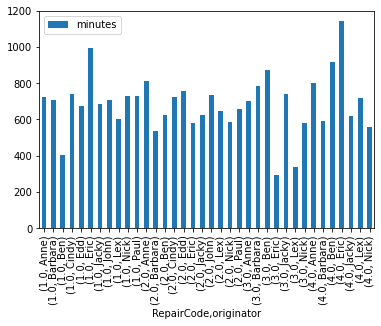

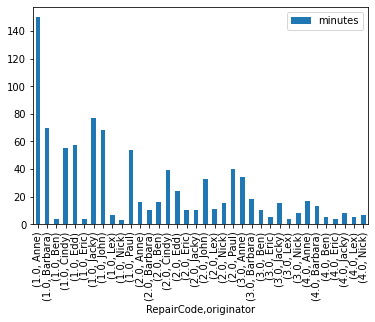

In [36]:
print(df.loc[:,['originator','RepairCode','RepairOK','minutes']].groupby('RepairCode').mean())
df.loc[:,['originator','RepairCode','RepairOK','minutes']].groupby(['RepairCode','originator']).mean().plot.bar()
df.loc[:,['originator','RepairCode','minutes']].groupby(['RepairCode','originator']).count().plot.bar()

# 업무별 평균소요시간

In [37]:
df.loc[:,['taskID','minutes']].groupby('taskID').mean()

minutes
taskID                            
ArrangeSurvey           708.838727
ExternRepair            726.310606
FirstContact            705.445445
ImmediateRepair         713.857702
InformClientSurvey      700.843413
InformClientWrongPlace  679.465753
InternRepair            730.478976
MakeTicket              711.808522
ReadyInformClient       729.329018
RepairReady             733.042071
SendTicketToFinAdmin    714.158576
Survey                  702.834951
TicketReady             714.386192

# 작업자별 업무배당

In [38]:
df1 = df.loc[:,['taskID','originator','minutes']].groupby(['taskID','originator']).mean()

In [39]:
df2 = df.loc[:,['taskID','originator','minutes']].groupby(['taskID','originator']).count()

In [40]:
df3 = df.loc[:,['taskID','originator','minutes']].groupby(['taskID','originator']).max()

In [41]:
ans = pd.concat([df1,df2,df3],axis=1)
ans.columns = ['minutes','count','max']
ans

minutes  count   max
taskID                 originator                         
ArrangeSurvey          Dian        710.110604    877  1439
                       Monica      707.697032    977  1437
ExternRepair           DoIt        754.893939     66  1414
                       FixIt       697.727273     66  1423
FirstContact           Dian        710.131183    465  1436
                       Monica      701.365169    534  1438
ImmediateRepair        Anne        715.572973    370  1439
                       Barbara     727.448864    176  1430
                       Ben         432.500000      8   722
                       Eric        844.000000      8  1390
                       Jacky       708.956522    184  1430
                       Lex         630.857143     14  1361
                       Nick        755.000000      6  1059
InformClientSurvey     System      700.843413    926  1437
InformClientWrongPlace Dian        686.310345     29  1436
                       Monica      674.954545     44  1438
InternRepair           Anne        758.733333     60  1437
                       Barbara     709.333333     30  1422
                       Ben         628.809524     42  1417
                       Cindy       734.620000    200  1416
                       Edd         742.323810    210  1425
                       Eric        694.772727     44  1339
                       Jacky       844.764706     34  1430
                       John        738.298969    194  1424
                       Lex         703.000000     44  1381
                       Nick        667.500000     36  1381
                       Paul        730.376884    199  1410
MakeTicket             Dian        714.758581    874  1439
                       Monica      709.177551    980  1435
ReadyInformClient      System      729.329018    927  1437
RepairReady            System      733.042071    927  1439
SendTicketToFinAdmin   System      714.158576    927  1433
Survey                 Anne        732.917241    435  1439
                       Barbara     693.864865    222  1430
                       Ben         738.400000     70  1435
                       Cindy       743.664894    188  1430
                       Edd         691.432099    162  1425
                       Eric        704.565217     46  1423
                       Jacky       693.336364    220  1429
                       John        704.272277    202  1437
                       Lex         587.888889     54  1307
                       Nick        578.287879     66  1321
                       Paul        687.351064    188  1410
TicketReady            System      714.386192    927  1434

In [43]:
df1 = df.loc[:,['taskID','originator','minutes']].groupby(['originator','taskID']).mean()
df1

minutes
originator taskID                            
Anne       ImmediateRepair         715.572973
           InternRepair            758.733333
           Survey                  732.917241
Barbara    ImmediateRepair         727.448864
           InternRepair            709.333333
           Survey                  693.864865
Ben        ImmediateRepair         432.500000
           InternRepair            628.809524
           Survey                  738.400000
Cindy      InternRepair            734.620000
           Survey                  743.664894
Dian       ArrangeSurvey           710.110604
           FirstContact            710.131183
           InformClientWrongPlace  686.310345
           MakeTicket              714.758581
DoIt       ExternRepair            754.893939
Edd        InternRepair            742.323810
           Survey                  691.432099
Eric       ImmediateRepair         844.000000
           InternRepair            694.772727
           Survey                  704.565217
FixIt      ExternRepair            697.727273
Jacky      ImmediateRepair         708.956522
           InternRepair            844.764706
           Survey                  693.336364
John       InternRepair            738.298969
           Survey                  704.272277
Lex        ImmediateRepair         630.857143
           InternRepair            703.000000
           Survey                  587.888889
Monica     ArrangeSurvey           707.697032
           FirstContact            701.365169
           InformClientWrongPlace  674.954545
           MakeTicket              709.177551
Nick       ImmediateRepair         755.000000
           InternRepair            667.500000
           Survey                  578.287879
Paul       InternRepair            730.376884
           Survey                  687.351064
System     InformClientSurvey      700.843413
           ReadyInformClient       729.329018
           RepairReady             733.042071
           SendTicketToFinAdmin    714.158576
           TicketReady             714.386192

# Capacity - mean time 

In [44]:
df['minutes'].describe()

count    13262.000000
mean       713.573518
std        418.301835
min          0.000000
25%        349.000000
50%        706.000000
75%       1081.000000
max       1439.000000
Name: minutes, dtype: float64

<AxesSubplot:>

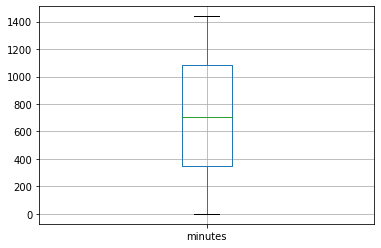

In [45]:
pd.DataFrame(df['minutes']).boxplot()

In [46]:
summary = pd.DataFrame()

In [47]:
tp = df.loc[:,['originator','minutes']].groupby(['originator']).mean()
summary.index = tp.index
summary['minutes'] = tp['minutes']

In [48]:
tp = df.loc[:,['originator','minutes']].groupby(['originator']).count()
summary['count'] = tp['minutes']

In [49]:
summary

minutes  count
originator                   
Anne        727.289017    865
Barbara     708.759346    428
Ben         679.650000    120
Cindy       739.002577    388
Dian        711.690561   2246
DoIt        754.893939     66
Edd         720.161290    372
Eric        711.551020     98
FixIt       697.727273     66
Jacky       711.652968    438
John        720.941919    396
Lex         638.482143    112
Monica      706.367258   2535
Nick        617.842593    108
Paul        709.475452    387
System      718.322762   4635

In [50]:
df['contact'].value_counts() # 채널별 시간구조

Phone       270
Web         265
Personal    240
Letter      225
Name: contact, dtype: int64

In [51]:
tp = df.loc[:,['taskID','originator','minutes','date']].groupby(['date','taskID','originator']).mean()
tp

minutes
date       taskID               originator         
1905-05-23 FirstContact         Dian            0.0
                                Monica          0.0
           MakeTicket           Dian            0.0
           SendTicketToFinAdmin System          0.0
           TicketReady          System          0.0
...                                             ...
2022-05-10 InformClientSurvey   System        619.0
2022-05-11 TicketReady          System       1200.0
2022-05-12 FirstContact         Monica        402.0
2022-05-13 MakeTicket           Dian         1265.0
2022-05-14 InternRepair         Lex           288.0

[1389 rows x 1 columns]

In [52]:
tp = df.loc[:,['originator','minutes','date']].groupby(['date','originator']).mean().reset_index()
tp

date originator      minutes
0    1905-05-23       Dian     0.000000
1    1905-05-23     Monica     0.000000
2    1905-05-23     System     0.000000
3    1970-01-01       Anne  1045.638889
4    1970-01-01    Barbara  1075.000000
...         ...        ...          ...
1079 2022-05-10     System   619.000000
1080 2022-05-11     System  1200.000000
1081 2022-05-12     Monica   402.000000
1082 2022-05-13       Dian  1265.000000
1083 2022-05-14        Lex   288.000000

[1084 rows x 3 columns]

In [53]:
target = tp.groupby(['date','originator']).count().reset_index()
target = target[target['date'] >= '2010-01-01']
target

date originator  minutes
224  2020-01-06     System        1
225  2020-01-07     Monica        1
226  2020-01-08     System        1
227  2020-01-09        Edd        1
228  2020-01-10        Edd        1
...         ...        ...      ...
1079 2022-05-10     System        1
1080 2022-05-11     System        1
1081 2022-05-12     Monica        1
1082 2022-05-13       Dian        1
1083 2022-05-14        Lex        1

[860 rows x 3 columns]

In [81]:
tp2 = df.loc[:,['taskID','minutes','date']].groupby(['date','taskID']).count()
tp2 = tp2.reset_index()
tp2 = tp2[tp2['date'] >= '2010-01-01']
tp2.groupby(['date','taskID']).max()

minutes
date       taskID                     
2020-01-06 InformClientSurvey        1
2020-01-07 ArrangeSurvey             1
2020-01-08 ReadyInformClient         1
2020-01-09 Survey                    1
2020-01-10 Survey                    1
...                                ...
2022-05-10 InformClientSurvey        1
2022-05-11 TicketReady               1
2022-05-12 FirstContact              1
2022-05-13 MakeTicket                1
2022-05-14 InternRepair              1

[860 rows x 1 columns]

Text(0, 0.5, 'capacity')

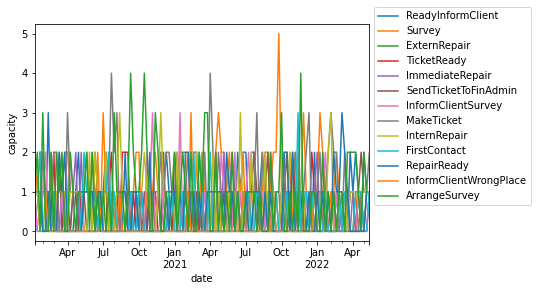

In [90]:
import matplotlib.pyplot as plt
name_list = list(set(tp2['taskID']))
for name in name_list:
    tp2[tp2['taskID'] == name].groupby([pd.Grouper(key='date', freq='1W')])['minutes'].count().plot()
plt.legend(name_list, bbox_to_anchor=(1, 1.1))
plt.ylabel('capacity')

# Capacity - week, whole count

<AxesSubplot:xlabel='date'>

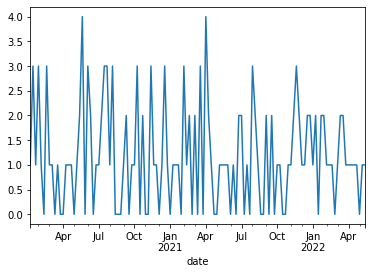

In [414]:
target[target['originator'] == 'Dian'].groupby([pd.Grouper(key='date', freq='W')])['minutes'].count().plot()


Text(0, 0.5, 'capacity')

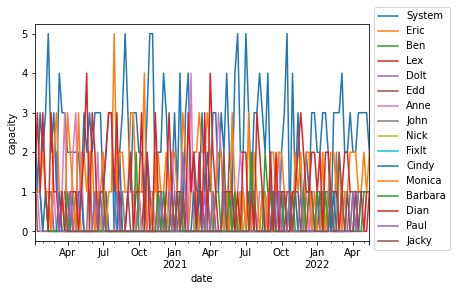

In [438]:
import matplotlib.pyplot as plt
name_list = list(set(tp['originator']))
for name in name_list:
    target[target['originator'] == name].groupby([pd.Grouper(key='date', freq='W')])['minutes'].count().plot()
    
plt.legend(name_list, bbox_to_anchor=(1, 1.1))
plt.ylabel('capacity')

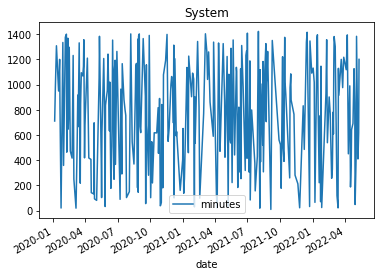

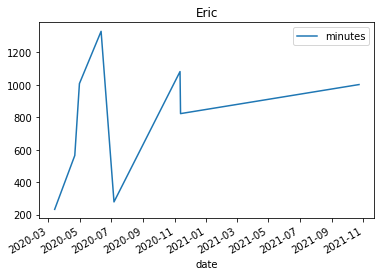

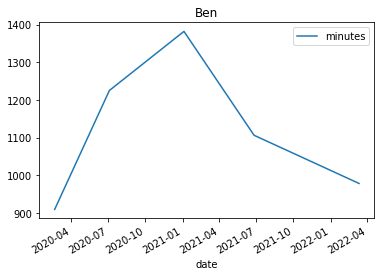

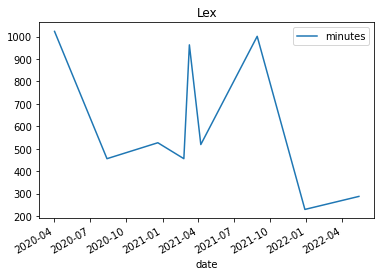

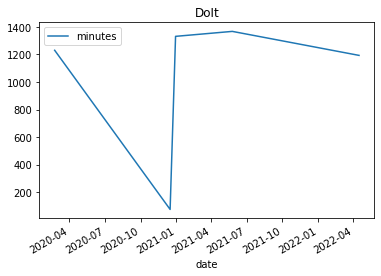

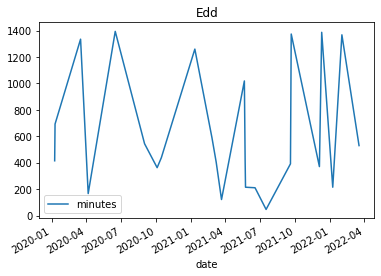

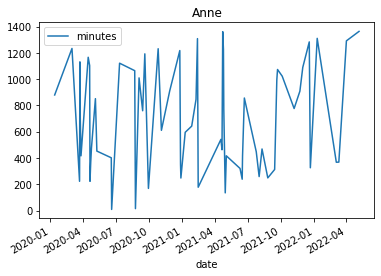

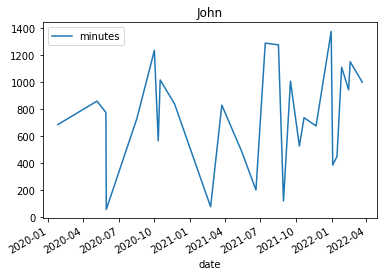

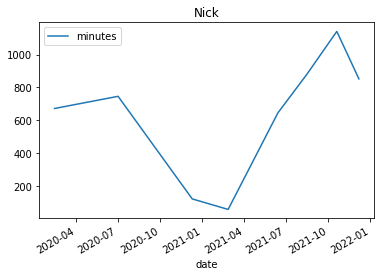

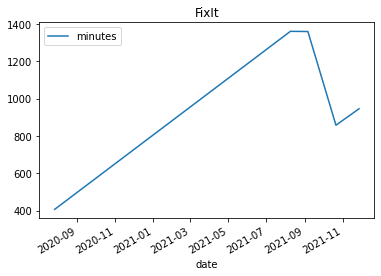

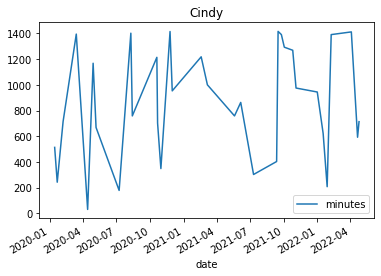

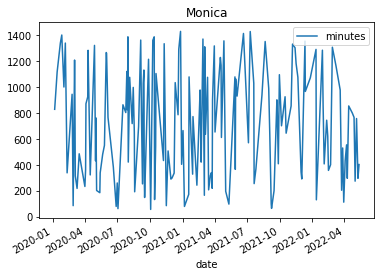

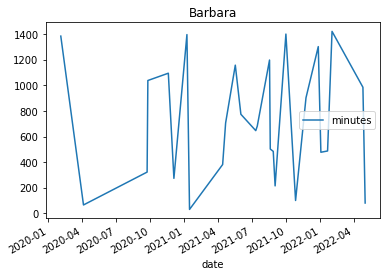

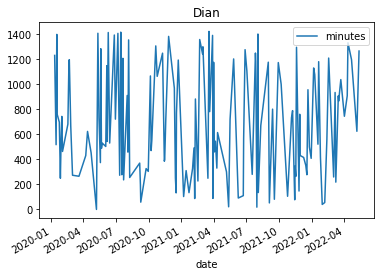

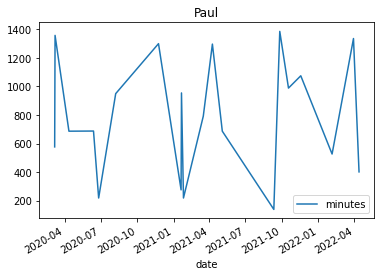

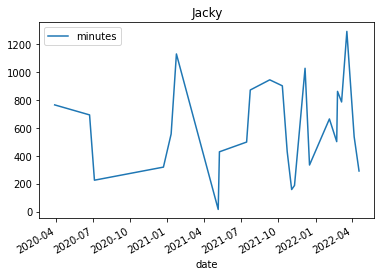

In [365]:
tp = tp[tp['date'] >= '2018-01-01']
for name in name_list:
    tp[tp['originator'] == name].plot('date','minutes',title=name)

In [324]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1084 non-null   datetime64[ns]
 1   originator  1084 non-null   object        
 2   minutes     1084 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.5+ KB


<AxesSubplot:xlabel='originator', ylabel='count'>

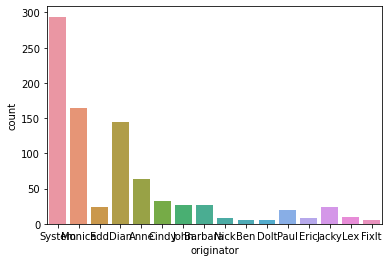

In [364]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='originator',data=target)

---

In [9]:
from pm4py.objects.log.importer.xes import importer
from pm4py.objects.conversion.log.converter import to_data_frame
from pm4py.algo.filtering.pandas.attributes import attributes_filter
from pm4py.statistics.traces.log import case_statistics
from pm4py.objects.log.util import interval_lifecycle
from pm4py.statistics.traces.log import case_arrival
from pm4py.statistics.sojourn_time.log import get as soj_time_get
from pm4py.visualization.graphs import visualizer as graphs_visualizer
from pm4py.util import constants
from pm4py.algo.filtering.log.timestamp import timestamp_filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.decisiontree import visualizer as tree_visualizer
from pm4py.algo.decision_mining import algorithm as decision_mining

C:\Users\User\anaconda3\lib\site-packages\pm4py\statistics\traces\log\__init__.py:19: UserWarning: pm4py.statistics.traces.log is deprecated. Please use pm4py.statistics.traces.generic.log instead!
  warnings.warn("pm4py.statistics.traces.log is deprecated. Please use pm4py.statistics.traces.generic.log instead!")


In [244]:
log = importer.apply('repairExample.xes')

parsing log, completed traces ::   0%|          | 0/1104 [00:00<?, ?it/s]

In [245]:
log[0][0]

{'org:resource': 'System', 'time:timestamp': datetime.datetime(1970, 1, 2, 12, 23, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'concept:name': 'Register', 'lifecycle:transition': 'complete'}

In [246]:
df = to_data_frame.apply(log)
df

org:resource            time:timestamp      concept:name  \
0           System 1970-01-02 12:23:00+01:00          Register   
1          Tester3 1970-01-02 12:23:00+01:00    Analyze Defect   
2          Tester3 1970-01-02 12:30:00+01:00    Analyze Defect   
3         SolverC1 1970-01-02 12:31:00+01:00  Repair (Complex)   
4         SolverC1 1970-01-02 12:49:00+01:00  Repair (Complex)   
...            ...                       ...               ...   
11850     SolverS3 1970-01-22 19:48:00+01:00   Repair (Simple)   
11851      Tester2 1970-01-22 19:48:00+01:00       Test Repair   
11852      Tester2 1970-01-22 19:55:00+01:00       Test Repair   
11853       System 1970-01-22 19:56:00+01:00       Inform User   
11854       System 1970-01-22 20:00:00+01:00    Archive Repair   

      lifecycle:transition case:concept:name            case:description  \
0                 complete                 1  Simulated process instance   
1                    start                 1  Simulated process instance   
2                 complete                 1  Simulated process instance   
3                    start                 1  Simulated process instance   
4                 complete                 1  Simulated process instance   
...                    ...               ...                         ...   
11850             complete               999  Simulated process instance   
11851                start               999  Simulated process instance   
11852             complete               999  Simulated process instance   
11853             complete               999  Simulated process instance   
11854             complete               999  Simulated process instance   

      defectType phoneType numberRepairs defectFixed  
0            NaN       NaN           NaN         NaN  
1            NaN       NaN           NaN         NaN  
2              6        T2           NaN         NaN  
3            NaN       NaN           NaN         NaN  
4            NaN       NaN           NaN         NaN  
...          ...       ...           ...         ...  
11850        NaN       NaN           NaN         NaN  
11851        NaN       NaN           NaN         NaN  
11852        NaN       NaN             2        true  
11853        NaN       NaN           NaN         NaN  
11854        NaN       NaN             2        true  

[11855 rows x 10 columns]

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11855 entries, 0 to 11854
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype                    
---  ------                --------------  -----                    
 0   org:resource          11855 non-null  object                   
 1   time:timestamp        11855 non-null  datetime64[ns, UTC+01:00]
 2   concept:name          11855 non-null  object                   
 3   lifecycle:transition  11855 non-null  object                   
 4   case:concept:name     11855 non-null  object                   
 5   case:description      11855 non-null  object                   
 6   defectType            1104 non-null   object                   
 7   phoneType             1104 non-null   object                   
 8   numberRepairs         2508 non-null   object                   
 9   defectFixed           2508 non-null   object                   
dtypes: datetime64[ns, UTC+01:00](1), object(9)
memory usage: 9

In [248]:
start_activities = start_activities_filter.get_start_activities(log)
end_activities = end_activities_filter.get_end_activities(log)
print(end_activities)

# filtered_log = end_activities_filter.apply(log, ["Repair (Complex)"], parameters={'positive':False})
# filtered_end_activities = end_activities_filter.get_end_activities(filtered_log)
# print(filtered_end_activities)

{'Archive Repair': 1000, 'Test Repair': 75, 'Inform User': 27, 'Repair (Complex)': 2}


In [253]:
filtered_log = end_activities_filter.apply(log, ["Repair (Complex)"], parameters={'positive':False})
filtered_end_activities = end_activities_filter.get_end_activities(filtered_log)

In [254]:
filtered_log[0]

{'attributes': {'concept:name': '1', 'description': 'Simulated process instance'}, 'events': [{'org:resource': 'System', 'time:timestamp': datetime.datetime(1970, 1, 2, 12, 23, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'concept:name': 'Register', 'lifecycle:transition': 'complete', 'case:concept:name': '1', 'case:description': 'Simulated process instance'}, '..', {'numberRepairs': '0', 'org:resource': 'System', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(1970, 1, 2, 13, 10, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'concept:name': 'Archive Repair', 'defectFixed': 'true', 'case:concept:name': '1', 'case:description': 'Simulated process instance'}]}

In [255]:
net_in, im_in, fm_in = inductive_miner.apply(filtered_log)
gviz_in = pn_visualizer.apply(net_in, im_in, fm_in)

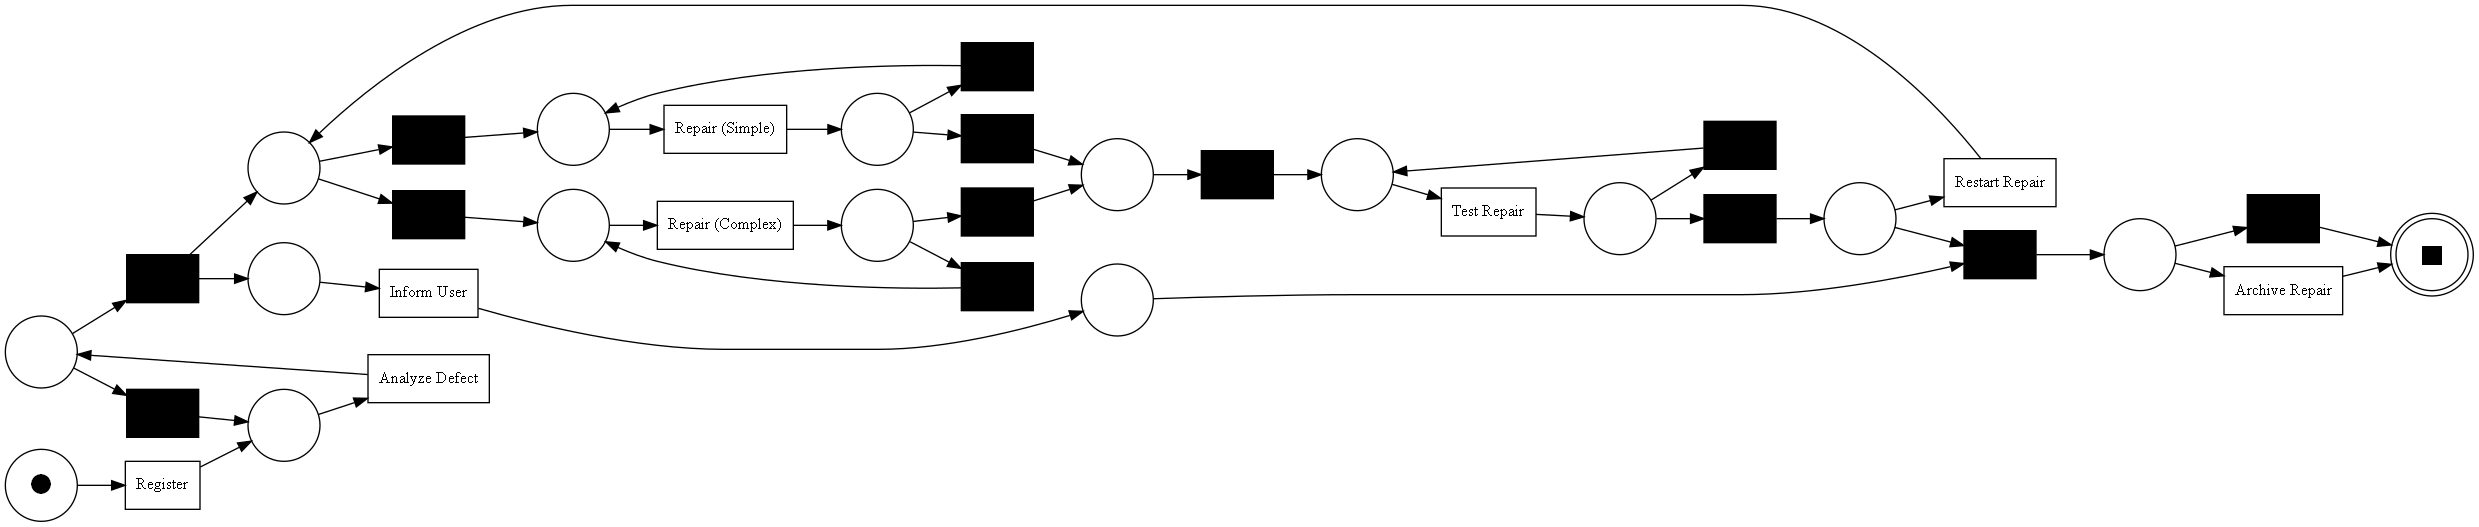

In [256]:
pn_visualizer.view(gviz_in)

In [152]:
inductive_miner.apply(filtered_log)

(places: [ p_10, p_13, p_14, p_15, p_16, p_17, p_19, p_20, p_22, p_23, p_5, p_6, p_8, p_9, sink, source ]
 transitions: [ (2f23e5e8-3846-4c06-8bde-73c1ab3e3ca8, 'Archive Repair'), (47380ce7-1860-4769-a2f3-60be334d8b10, 'Repair (Complex)'), (51f0f6bf-6d0b-4c5f-b936-a4b3bd468d98, 'Analyze Defect'), (6d2e0a18-a18a-4f75-a374-9d5cdc3c251d, 'Inform User'), (989dcf59-d6a7-4c12-bc15-6533f4d88eb9, 'Test Repair'), (9ca27c05-d135-460c-872f-92b5f09c7a31, 'Repair (Simple)'), (a5352d55-7f23-4502-b898-cc4788dcf99d, 'Restart Repair'), (bd2af673-88fa-4d2f-96cf-910ddeb28611, 'Register'), (init_loop_13, None), (init_loop_17, None), (init_loop_9, None), (skip_11, None), (skip_12, None), (skip_15, None), (skip_16, None), (skip_19, None), (skip_20, None), (skip_22, None), (skip_3, None), (skip_4, None), (tauJoin_6, None) ]
 arcs: [ (2f23e5e8-3846-4c06-8bde-73c1ab3e3ca8, 'Archive Repair')->sink, (47380ce7-1860-4769-a2f3-60be334d8b10, 'Repair (Complex)')->p_20, (51f0f6bf-6d0b-4c5f-b936-a4b3bd468d98, 'Analyze 

---

In [60]:
dataframe = pd.read_csv('./repair2.csv')
#dataframe = dataframe.loc[:,['date','time']]
dataframe.loc[i,'date'] + ' ' + dataframe.loc[i,'time']
col = [f"{dataframe.loc[i,'date']} {dataframe.loc[i,'time']}" for i in range(len(dataframe))]

dataframe = dataframe.drop('time',axis=1)
dataframe = dataframe.drop('date',axis=1)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               13262 non-null  int64  
 1   taskID               13260 non-null  object 
 2   originator           13260 non-null  object 
 3   eventtype            13257 non-null  object 
 4   contact              1000 non-null   object 
 5   RepairType           927 non-null    object 
 6   objectKey            927 non-null    float64
 7   RepairInternally     927 non-null    object 
 8   EstimatedRepairTime  927 non-null    float64
 9   RepairCode           927 non-null    float64
 10  RepairOK             1854 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.1+ MB


In [63]:
date = []
for i in col:
    try:
        date.append(pd.to_datetime(i))
    except:
        date.append('')

In [33]:
dataframe = pd.read_csv('./repair2.csv')

concat_df = pd.DataFrame()
for i in range(1,1001):
    tp = dataframe.groupby('caseID').get_group(i).sort_values(['date','time'])
    concat_df = pd.concat([concat_df,tp])
concat_df

caseID                taskID originator eventtype contact RepairType  \
5903        1          FirstContact       Dian  complete   Phone        NaN   
11087       1            MakeTicket       Dian     start     NaN        NaN   
4035        1            MakeTicket       Dian  complete     NaN          E   
5098        1         ArrangeSurvey       Dian     start     NaN        NaN   
4561        1         ArrangeSurvey       Dian  complete     NaN        NaN   
...       ...                   ...        ...       ...     ...        ...   
5081     1000           RepairReady     System  complete     NaN        NaN   
8609     1000          InternRepair       John  complete     NaN        NaN   
2987     1000     ReadyInformClient     System  complete     NaN        NaN   
3604     1000           TicketReady     System  complete     NaN        NaN   
748      1000  SendTicketToFinAdmin     System  complete     NaN        NaN   

       objectKey RepairInternally  EstimatedRepairTime  RepairCode RepairOK  \
5903         NaN              NaN                  NaN         NaN      NaN   
11087        NaN              NaN                  NaN         NaN      NaN   
4035      1340.0              NaN                  NaN         NaN      NaN   
5098         NaN              NaN                  NaN         NaN      NaN   
4561         NaN              NaN                  NaN         NaN      NaN   
...          ...              ...                  ...         ...      ...   
5081         NaN              NaN                  NaN         NaN     True   
8609         NaN              NaN                  NaN         NaN      NaN   
2987         NaN              NaN                  NaN         NaN     True   
3604         NaN              NaN                  NaN         NaN      NaN   
748          NaN              NaN                  NaN         NaN      NaN   

             date   time  
5903   1905-05-23   0:00  
11087  1970-01-02   8:08  
4035   1970-01-02   8:11  
5098   1970-01-02   8:11  
4561   1970-01-02   8:16  
...           ...    ...  
5081   1970-01-19  18:34  
8609   1970-01-19  18:34  
2987   1970-01-20   2:25  
3604   1970-01-20   2:25  
748    2022-01-23   1:11  

[13262 rows x 13 columns]

In [34]:
concat_df

caseID                taskID originator eventtype contact RepairType  \
5903        1          FirstContact       Dian  complete   Phone        NaN   
11087       1            MakeTicket       Dian     start     NaN        NaN   
4035        1            MakeTicket       Dian  complete     NaN          E   
5098        1         ArrangeSurvey       Dian     start     NaN        NaN   
4561        1         ArrangeSurvey       Dian  complete     NaN        NaN   
...       ...                   ...        ...       ...     ...        ...   
5081     1000           RepairReady     System  complete     NaN        NaN   
8609     1000          InternRepair       John  complete     NaN        NaN   
2987     1000     ReadyInformClient     System  complete     NaN        NaN   
3604     1000           TicketReady     System  complete     NaN        NaN   
748      1000  SendTicketToFinAdmin     System  complete     NaN        NaN   

       objectKey RepairInternally  EstimatedRepairTime  RepairCode RepairOK  \
5903         NaN              NaN                  NaN         NaN      NaN   
11087        NaN              NaN                  NaN         NaN      NaN   
4035      1340.0              NaN                  NaN         NaN      NaN   
5098         NaN              NaN                  NaN         NaN      NaN   
4561         NaN              NaN                  NaN         NaN      NaN   
...          ...              ...                  ...         ...      ...   
5081         NaN              NaN                  NaN         NaN     True   
8609         NaN              NaN                  NaN         NaN      NaN   
2987         NaN              NaN                  NaN         NaN     True   
3604         NaN              NaN                  NaN         NaN      NaN   
748          NaN              NaN                  NaN         NaN      NaN   

             date   time  
5903   1905-05-23   0:00  
11087  1970-01-02   8:08  
4035   1970-01-02   8:11  
5098   1970-01-02   8:11  
4561   1970-01-02   8:16  
...           ...    ...  
5081   1970-01-19  18:34  
8609   1970-01-19  18:34  
2987   1970-01-20   2:25  
3604   1970-01-20   2:25  
748    2022-01-23   1:11  

[13262 rows x 13 columns]

In [64]:
import pandas as pd
import pm4py
dataframe = pd.read_csv('./repair2.csv')
#dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
#dataframe = dataframe.groupby('caseID').sort_values('date','time')
dataframe = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID', timestamp_key='date')
event_log = pm4py.convert_to_event_log(dataframe)

C:\Users\User\anaconda3\lib\site-packages\pm4py\utils.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[constants.CASE_CONCEPT_NAME] = df[constants.CASE_CONCEPT_NAME].astype("string")
C:\Users\User\anaconda3\lib\site-packages\pm4py\utils.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[xes_constants.DEFAULT_NAME_KEY] = df[xes_constants.DEFAULT_NAME_KEY].astype("string")


In [65]:
start_activities = start_activities_filter.get_start_activities(event_log)
end_activities = end_activities_filter.get_end_activities(event_log)
print(end_activities)

{'TicketReady': 112, 'ImmediateRepair': 60, 'ArrangeSurvey': 84, 'SendTicketToFinAdmin': 106, 'InternRepair': 88, 'InformClientWrongPlace': 38, 'RepairReady': 84, 'ReadyInformClient': 95, 'MakeTicket': 87, 'FirstContact': 71, 'Survey': 114, 'InformClientSurvey': 48, 'ExternRepair': 13}


In [66]:
net_in, im_in, fm_in = inductive_miner.apply(event_log)
gviz_in = pn_visualizer.apply(net_in, im_in, fm_in)

In [67]:
pn_visualizer.view(gviz_in)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [276]:
from pm4py.algo.filtering.pandas.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(dataframe,attribute_key='concept:name')
activities

{'MakeTicket': 1854,
 'ArrangeSurvey': 1853,
 'Survey': 1852,
 'InternRepair': 1094,
 'FirstContact': 998,
 'SendTicketToFinAdmin': 927,
 'TicketReady': 926,
 'ReadyInformClient': 925,
 'RepairReady': 925,
 'InformClientSurvey': 924,
 'ImmediateRepair': 765,
 'ExternRepair': 131,
 'InformClientWrongPlace': 73}

In [68]:
from pm4py.algo.discovery.heuristics import algorithm
from pm4py.visualization.heuristics_net import visualizer
#     algorithm.Variants.CLASSIC.value.Parameters.AND_MEASURE_THRESH : 0.05,
# algorithm.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH : 0.9,
# algorithm.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT : 150,
# algorithm.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH : 2,
# algorithm.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH : 0.5,
parms = {
    algorithm.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH : 0,
    algorithm.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT : 50,
    algorithm.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH : 2,
    algorithm.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH : 0.1,
}
heu = algorithm.apply_heu(event_log,parms)

In [69]:
viz = visualizer.apply(heu)
visualizer.view(viz)

InvocationException: GraphViz's executables not found

In [266]:
log

[{'attributes': {'concept:name': '1', 'description': 'Simulated process instance'}, 'events': [{'org:resource': 'System', 'time:timestamp': datetime.datetime(1970, 1, 2, 12, 23, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'concept:name': 'Register', 'lifecycle:transition': 'complete', 'case:concept:name': '1', 'case:description': 'Simulated process instance'}, '..', {'numberRepairs': '0', 'org:resource': 'System', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(1970, 1, 2, 13, 10, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'concept:name': 'Archive Repair', 'defectFixed': 'true', 'case:concept:name': '1', 'case:description': 'Simulated process instance'}]}, '....', {'attributes': {'concept:name': '999', 'description': 'Simulated process instance'}, 'events': [{'org:resource': 'System', 'time:timestamp': datetime.datetime(1970, 1, 22, 19, 1, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'concept:name': 'Register', 

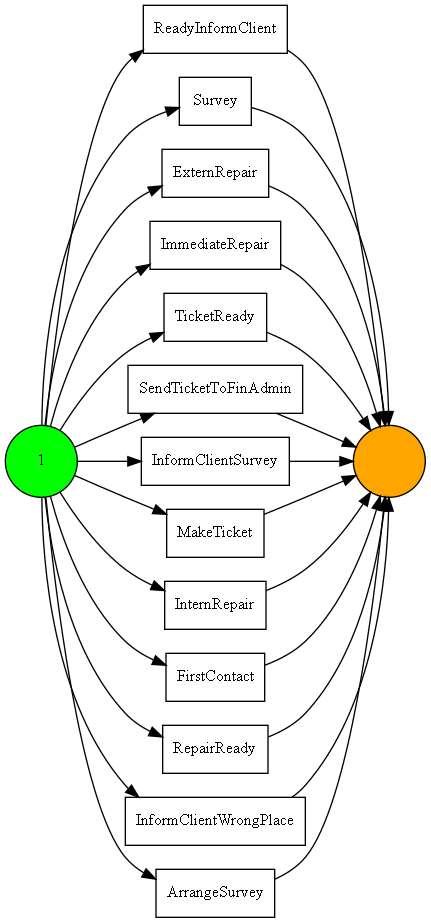

In [279]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petrinet import visualizer as pn_visualizer

net, initial_marking, final_marking = alpha_miner.apply(event_log)
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\pm4py\utils.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[constants.CASE_CONCEPT_NAME] = df[constants.CASE_CONCEPT_NAME].astype("string")
C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\pm4py\utils.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[xes_constants.DEFAULT_NAME_KEY] = df[xes_constants.DEFAULT_NAME_KEY].astype("string")


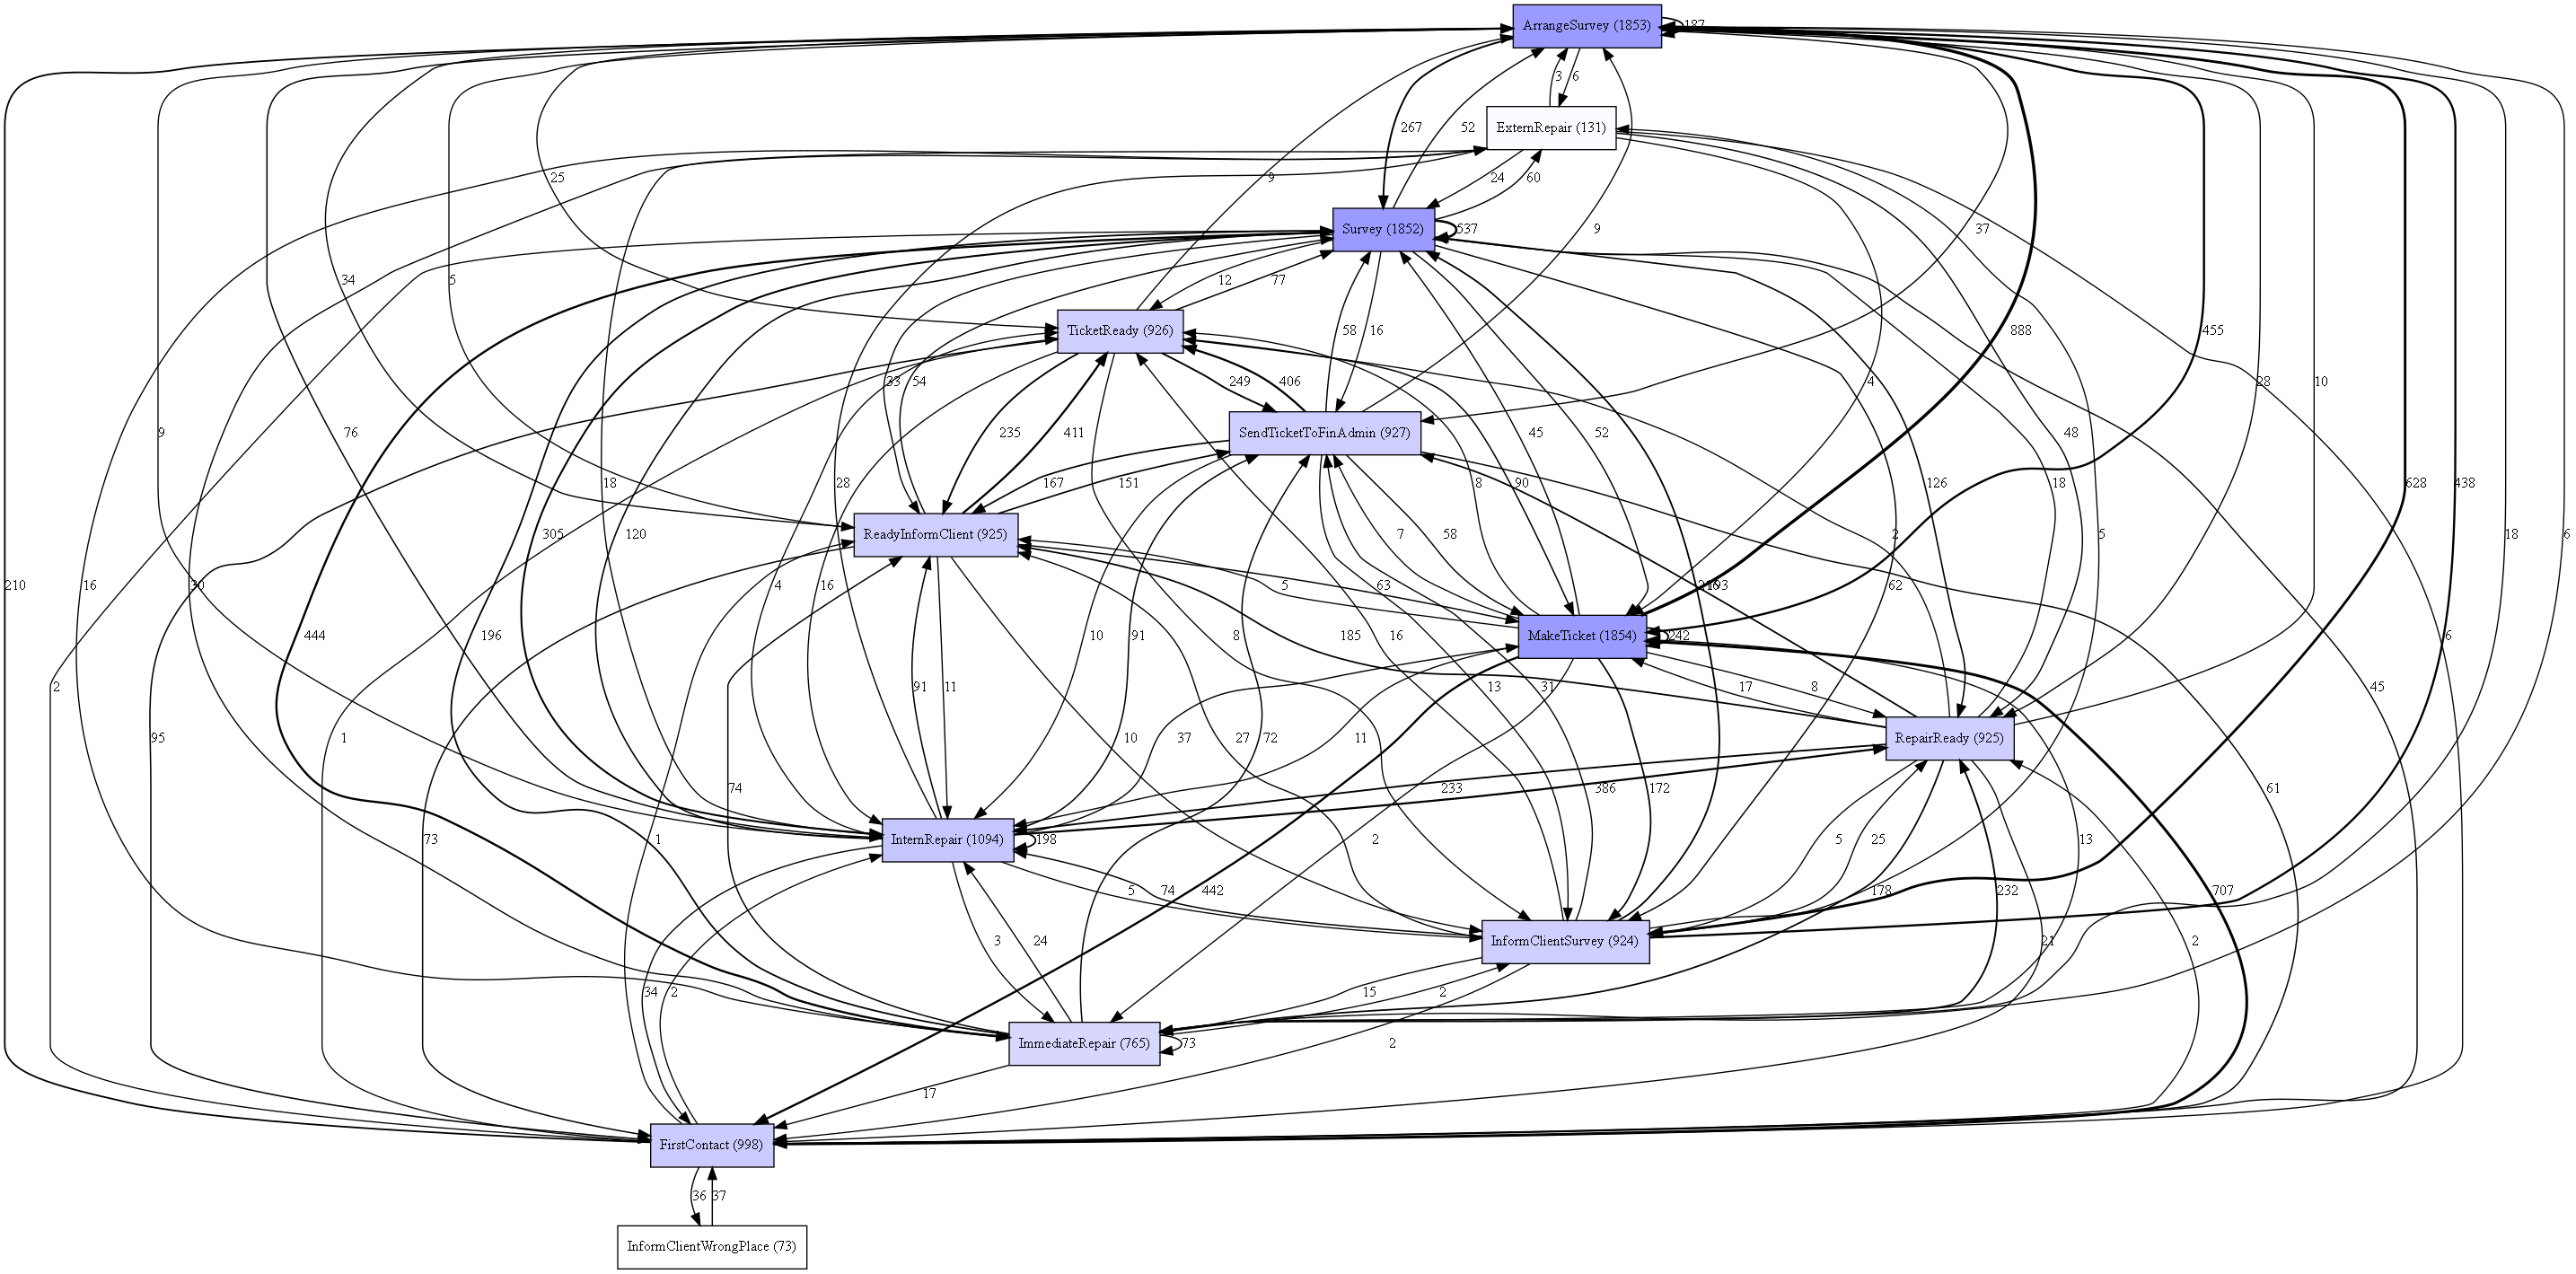

In [204]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
import pandas as pd
import pm4py

dataframe = pd.read_csv('./repair2.csv')
#dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
dataframe = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID', start_timestamp_key='date',timestamp_key='time')

event_log = pm4py.convert_to_event_log(dataframe)
dfg = dfg_discovery.apply(event_log)
gviz = dfg_visualization.apply(dfg, log=event_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

In [556]:
dataframe.groupby('caseID').get_group(1)


caseID                taskID originator eventtype contact RepairType  \
0        1          FirstContact       Dian  complete   Phone        NaN   
1        1          InternRepair       John     start     NaN        NaN   
2        1            MakeTicket       Dian     start     NaN        NaN   
3        1            MakeTicket       Dian  complete     NaN          E   
4        1         ArrangeSurvey       Dian     start     NaN        NaN   
5        1          InternRepair       John  complete     NaN        NaN   
6        1           RepairReady     System  complete     NaN        NaN   
7        1         ArrangeSurvey       Dian  complete     NaN        NaN   
8        1    InformClientSurvey     System  complete     NaN        NaN   
9        1  SendTicketToFinAdmin     System  complete     NaN        NaN   
10       1     ReadyInformClient     System  complete     NaN        NaN   
11       1           TicketReady     System  complete     NaN        NaN   
12       1                Survey      Cindy     start     NaN        NaN   
13       1                Survey      Cindy  complete     NaN        NaN   

    objectKey RepairInternally  EstimatedRepairTime  RepairCode RepairOK  \
0         NaN              NaN                  NaN         NaN      NaN   
1         NaN              NaN                  NaN         NaN      NaN   
2         NaN              NaN                  NaN         NaN      NaN   
3      1340.0              NaN                  NaN         NaN      NaN   
4         NaN              NaN                  NaN         NaN      NaN   
5         NaN              NaN                  NaN         NaN      NaN   
6         NaN              NaN                  NaN         NaN     True   
7         NaN              NaN                  NaN         NaN      NaN   
8         NaN              NaN                  NaN         NaN      NaN   
9         NaN              NaN                  NaN         NaN      NaN   
10        NaN              NaN                  NaN         NaN     True   
11        NaN              NaN                  NaN         NaN      NaN   
12        NaN              NaN                  NaN         NaN      NaN   
13        NaN             True                240.0         1.0      NaN   

                        date                      time case:concept:name  \
0  1905-05-23 00:00:00+00:00 2022-09-08 00:00:00+00:00                 1   
1  1970-01-17 00:00:00+00:00 2022-09-08 04:36:00+00:00                 1   
2  1970-01-02 00:00:00+00:00 2022-09-08 08:08:00+00:00                 1   
3  1970-01-02 00:00:00+00:00 2022-09-08 08:11:00+00:00                 1   
4  1970-01-02 00:00:00+00:00 2022-09-08 08:11:00+00:00                 1   
5  1970-01-17 00:00:00+00:00 2022-09-08 08:12:00+00:00                 1   
6  1970-01-17 00:00:00+00:00 2022-09-08 08:12:00+00:00                 1   
7  1970-01-02 00:00:00+00:00 2022-09-08 08:16:00+00:00                 1   
8  1970-01-02 00:00:00+00:00 2022-09-08 08:16:00+00:00                 1   
9  1970-01-17 00:00:00+00:00 2022-09-08 14:03:00+00:00                 1   
10 1970-01-17 00:00:00+00:00 2022-09-08 15:44:00+00:00                 1   
11 1970-01-17 00:00:00+00:00 2022-09-08 15:44:00+00:00                 1   
12 1970-01-11 00:00:00+00:00 2022-09-08 21:33:00+00:00                 1   
13 1970-01-11 00:00:00+00:00 2022-09-08 21:56:00+00:00                 1   

            concept:name            time:timestamp  @@index  \
0           FirstContact 2022-09-08 00:00:00+00:00        0   
1           InternRepair 2022-09-08 04:36:00+00:00        1   
2             MakeTicket 2022-09-08 08:08:00+00:00        2   
3             MakeTicket 2022-09-08 08:11:00+00:00        3   
4          ArrangeSurvey 2022-09-08 08:11:00+00:00        4   
5           InternRepair 2022-09-08 08:12:00+00:00        5   
6            RepairReady 2022-09-08 08:12:00+00:00        6   
7          ArrangeSurvey 2022-09-08 08:16:00+00:00        7   
8     InformCl

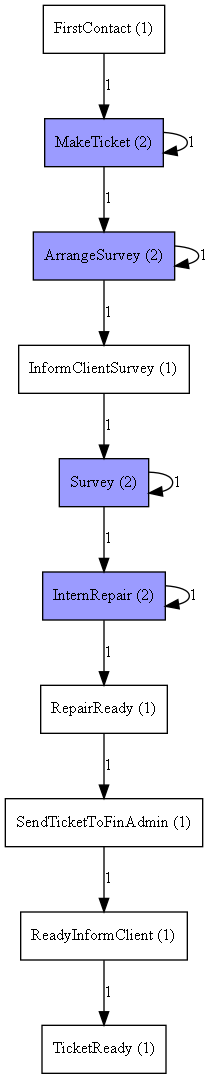

In [237]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
import pandas as pd
import pm4py

dataframe = pd.read_csv('./repair2.csv')
#dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
dataframe = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID', start_timestamp_key='date',timestamp_key='time')
dataframe = dataframe.groupby('caseID').get_group(1)
dataframe = dataframe.sort_values('date')

event_log = pm4py.convert_to_event_log(dataframe)
dfg = dfg_discovery.apply(event_log)
gviz = dfg_visualization.apply(dfg, log=event_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

In [232]:
import warnings
warnings.filterwarnings('ignore')

In [280]:
import pandas as pd
import pm4py

tp = pd.DataFrame()
dataframe = pd.read_csv('./repair2.csv')

temp = [str(i).split(':') for i in dataframe['time']]
minutes = []
for time in temp:
    i = 0
    if len(time) != 2:
        minutes.append(0)
        continue    
    i += int(time[0]) * 60 + int(time[1])
    minutes.append(i)

dataframe['minutes'] = minutes
    
    
for i in range(1,1001):
    #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
    merterial = merterial.groupby('caseID').get_group(i)
    merterial = merterial.sort_values('date')
    merterial['contact'] = merterial['contact'].fillna('ZZ')
    change = sorted(list(set(merterial['contact'])))
    merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
    if len(change) == 1:
        print(i)
    
    tp = pd.concat([tp,merterial])
    
event_log = pm4py.convert_to_event_log(tp)


180
245


In [281]:
event_log

[{'attributes': {'concept:name': '1'}, 'events': [{'caseID': 1, 'taskID': 'FirstContact', 'originator': 'Dian', 'eventtype': 'complete', 'contact': 'Phone', 'RepairType': nan, 'objectKey': nan, 'RepairInternally': nan, 'EstimatedRepairTime': nan, 'RepairCode': nan, 'RepairOK': nan, 'date': Timestamp('1905-05-23 00:00:00+0000', tz='UTC'), 'time': Timestamp('2022-09-13 00:00:00+0000', tz='UTC'), 'minutes': 0, 'concept:name': 'FirstContact', 'time:timestamp': Timestamp('1905-05-23 00:00:00+0000', tz='UTC'), '@@index': 0}, '..', {'caseID': 1, 'taskID': 'TicketReady', 'originator': 'System', 'eventtype': 'complete', 'contact': 'Phone', 'RepairType': nan, 'objectKey': nan, 'RepairInternally': nan, 'EstimatedRepairTime': nan, 'RepairCode': nan, 'RepairOK': nan, 'date': Timestamp('1970-01-17 00:00:00+0000', tz='UTC'), 'time': Timestamp('2022-09-13 15:44:00+0000', tz='UTC'), 'minutes': 944, 'concept:name': 'TicketReady', 'time:timestamp': Timestamp('1970-01-17 00:00:00+0000', tz='UTC'), '@@inde

In [201]:
dataframe[dataframe['caseID'] == 180] # 245

caseID                taskID originator eventtype contact RepairType  \
581       180          ExternRepair      FixIt     start     NaN        NaN   
1240      180           RepairReady     System  complete     NaN        NaN   
1880      180            MakeTicket       Dian     start     NaN        NaN   
2401      180    InformClientSurvey     System  complete     NaN        NaN   
3426      180       ImmediateRepair        Lex  complete     NaN        NaN   
4233      180                Survey        Lex     start     NaN        NaN   
4660      180       ImmediateRepair        Lex     start     NaN        NaN   
5265      180  SendTicketToFinAdmin     System  complete     NaN        NaN   
5910      180         ArrangeSurvey       Dian     start     NaN        NaN   
6612      180          FirstContact       Dian  complete     Web        NaN   
6847      180           TicketReady     System  complete     NaN        NaN   
7025      180                Survey        Lex  complete     NaN        NaN   
8401      180         ArrangeSurvey       Dian  complete     NaN        NaN   
11057     180            MakeTicket       Dian  complete     NaN          B   
12066     180     ReadyInformClient     System  complete     NaN        NaN   

       objectKey RepairInternally  EstimatedRepairTime  RepairCode RepairOK  \
581          NaN              NaN                  NaN         NaN      NaN   
1240         NaN              NaN                  NaN         NaN     True   
1880         NaN              NaN                  NaN         NaN      NaN   
2401         NaN              NaN                  NaN         NaN      NaN   
3426         NaN              NaN                  NaN         NaN      NaN   
4233         NaN              NaN                  NaN         NaN      NaN   
4660         NaN              NaN                  NaN         NaN      NaN   
5265         NaN              NaN                  NaN         NaN      NaN   
5910         NaN              NaN                  NaN         NaN      NaN   
6612         NaN              NaN                  NaN         NaN      NaN   
6847         NaN              NaN                  NaN         NaN      NaN   
7025         NaN             True                 60.0         1.0      NaN   
8401         NaN              NaN                  NaN         NaN      NaN   
11057     3231.0              NaN                  NaN         NaN      NaN   
12066        NaN              NaN                  NaN         NaN     True   

                           date                      time  minutes  \
581   2021-08-09 00:00:00+00:00 2022-09-13 22:41:00+00:00     1361   
1240  1970-01-02 00:00:00+00:00 2022-09-13 00:05:00+00:00        5   
1880  1905-05-23 00:00:00+00:00 2022-09-13 00:00:00+00:00        0   
2401  1970-01-01 00:00:00+00:00 2022-09-13 21:09:00+00:00     1269   
3426  1970-01-01 00:00:00+00:00 2022-09-13 22:41:00+00:00     1361   
4233  1970-01-01 00:00:00+00:00 2022-09-13 21:09:00+00:00     1269   
4660  1970-01-01 00:00:00+00:00 2022-09-13 21:47:00+00:00     1307   
5265  1970-01-02 00:00:00+00:00 2022-09-13 02:36:00+00:00      156   
5910  1970-01-01 00:00:00+00:00 2022-09-13 21:06:00+00:00     1266   
6612                        NaT                       NaT        0   
6847  1970-01-02 00:00:00+00:00 2022-09-13 03:06:00+00:00      186   
7025  1970-01-01 00:00:00+00:00 2022-09-13 21:47:00+00:00     1307   
8401  1970-01-01 00:00:00+00:00 2022-09-13 21:09:00+00:00     1269   
11057 1970-01-01 00:00:00+00:00 2022-09-13 21:06:00+00:00     1266   
12066 1970-01-02 00:00:00+00:00 2022-09-13 03:06:00+00:00      186   

       case:concept:name          concept:name            time:timestamp  
581                  180          ExternRepair 2021-08-09 00:00:00+00:00  
1240                 180           RepairReady 1970-01-02 00:00:00+00:00  
1880                 180            MakeTicket 1905-05-23 00:00:00+00:00  
2401                 180    InformClientSurvey 1970-01-0

In [191]:
merterial['contact'] = merterial['contact'].fillna('ZZ')
change = sorted(list(set(merterial['contact'])))
# ans = []
# for _ in range(len(merterial['contact'])):
#     ans.append(change[0])
    
merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
merterial

caseID                taskID originator eventtype contact RepairType  \
40    1000            MakeTicket     Monica     start     Web        NaN   
41    1000          FirstContact     Monica  complete     Web        NaN   
42    1000         ArrangeSurvey     Monica     start     Web        NaN   
43    1000            MakeTicket     Monica  complete     Web          E   
44    1000         ArrangeSurvey       Dian  complete     Web        NaN   
45    1000    InformClientSurvey     System  complete     Web        NaN   
46    1000                Survey      Cindy     start     Web        NaN   
47    1000                Survey      Cindy  complete     Web        NaN   
48    1000           RepairReady     System  complete     Web        NaN   
49    1000          InternRepair       John  complete     Web        NaN   
50    1000          InternRepair       John     start     Web        NaN   
51    1000     ReadyInformClient     System  complete     Web        NaN   
52    1000           TicketReady     System  complete     Web        NaN   
53    1000  SendTicketToFinAdmin     System  complete     Web        NaN   

    objectKey RepairInternally  EstimatedRepairTime  RepairCode RepairOK  \
40        NaN              NaN                  NaN         NaN      NaN   
41        NaN              NaN                  NaN         NaN      NaN   
42        NaN              NaN                  NaN         NaN      NaN   
43     9876.0              NaN                  NaN         NaN      NaN   
44        NaN              NaN                  NaN         NaN      NaN   
45        NaN              NaN                  NaN         NaN      NaN   
46        NaN              NaN                  NaN         NaN      NaN   
47        NaN             True                240.0         1.0      NaN   
48        NaN              NaN                  NaN         NaN     True   
49        NaN              NaN                  NaN         NaN      NaN   
50        NaN              NaN                  NaN         NaN      NaN   
51        NaN              NaN                  NaN         NaN     True   
52        NaN              NaN                  NaN         NaN      NaN   
53        NaN              NaN                  NaN         NaN      NaN   

                        date                      time  minutes  \
40 1970-01-07 00:00:00+00:00 2022-09-11 20:17:00+00:00     1217   
41 1970-01-07 00:00:00+00:00 2022-09-11 20:17:00+00:00     1217   
42 1970-01-07 00:00:00+00:00 2022-09-11 20:21:00+00:00     1221   
43 1970-01-07 00:00:00+00:00 2022-09-11 20:21:00+00:00     1221   
44 1970-01-08 00:00:00+00:00 2022-09-11 01:24:00+00:00       84   
45 1970-01-08 00:00:00+00:00 2022-09-11 01:24:00+00:00       84   
46 1970-01-16 00:00:00+00:00 2022-09-11 14:35:00+00:00      875   
47 1970-01-16 00:00:00+00:00 2022-09-11 14:58:00+00:00      898   
48 1970-01-19 00:00:00+00:00 2022-09-11 18:34:00+00:00     1114   
49 1970-01-19 00:00:00+00:00 2022-09-11 18:34:00+00:00     1114   
50 1970-01-19 00:00:00+00:00 2022-09-11 14:34:00+00:00      874   
51 1970-01-20 00:00:00+00:00 2022-09-11 02:25:00+00:00      145   
52 1970-01-20 00:00:00+00:00 2022-09-11 02:25:00+00:00      145   
53 2022-01-23 00:00:00+00:00 2022-09-11 01:11:00+00:00       71   

   case:concept:name          concept:name            time:timestamp  @@index  
40              1000            MakeTicket 1970-01-07 00:00:00+00:00       40  
41              1000          FirstContact 1970-01-07 00:00:00+00:00       41  
42              1000         ArrangeSurvey 1970-01-07 00:00:00+00:00       42  
43              1000            MakeTicket 1970-01-07 00:00:00+00:00       43  
44              1000         ArrangeSurvey 1970-01-08 00:00:00+00:00       44  
45              1000    InformClientSurvey 1970-01-08 00:00:00+00:00       45  
46              1000                Survey 1970-01-16 00:00:00+00:00       46  
47              1000                Survey 1970-01-16 00:00:00+00:00       4

In [157]:
trial = tp.loc[:,['caseID','minutes']].groupby('caseID').mean().reset_index()
trial = trial.sort_values('minutes')[:30]
list(trial['caseID'])

[499,
 883,
 230,
 769,
 559,
 531,
 834,
 514,
 817,
 6,
 966,
 738,
 281,
 754,
 299,
 397,
 640,
 715,
 88,
 909,
 104,
 577,
 107,
 27,
 403,
 388,
 978,
 877,
 115,
 558]

In [158]:
blank = pd.DataFrame()
for i in list(trial['caseID']):
    blank = pd.concat([blank,tp[tp['caseID'] == i]])

blank

caseID                  taskID originator eventtype   contact  \
5937      499  InformClientWrongPlace       Dian  complete       NaN   
5938      499            FirstContact       Dian  complete    Letter   
11480     883            FirstContact     Monica  complete     Phone   
11481     883  InformClientWrongPlace     Monica  complete       NaN   
1946      230            FirstContact     Monica  complete       Web   
...       ...                     ...        ...       ...       ...   
6856      558            FirstContact     Monica  complete  Personal   
6857      558           ArrangeSurvey     Monica  complete       NaN   
6858      558      InformClientSurvey     System  complete       NaN   
6859      558            InternRepair       John  complete       NaN   
6860      558    SendTicketToFinAdmin     System  complete       NaN   

      RepairType  objectKey RepairInternally  EstimatedRepairTime  RepairCode  \
5937         NaN        NaN              NaN                  NaN         NaN   
5938         NaN        NaN              NaN                  NaN         NaN   
11480        NaN        NaN              NaN                  NaN         NaN   
11481        NaN        NaN              NaN                  NaN         NaN   
1946         NaN        NaN              NaN                  NaN         NaN   
...          ...        ...              ...                  ...         ...   
6856         NaN        NaN              NaN                  NaN         NaN   
6857         NaN        NaN              NaN                  NaN         NaN   
6858         NaN        NaN              NaN                  NaN         NaN   
6859         NaN        NaN              NaN                  NaN         NaN   
6860         NaN        NaN              NaN                  NaN         NaN   

      RepairOK                      date                      time  minutes  \
5937       NaN 1970-01-07 00:00:00+00:00 2022-09-09 00:16:00+00:00       16   
5938       NaN 1970-01-07 00:00:00+00:00 2022-09-09 00:16:00+00:00       16   
11480      NaN 1970-01-06 00:00:00+00:00 2022-09-09 00:20:00+00:00       20   
11481      NaN 1970-01-06 00:00:00+00:00 2022-09-09 00:20:00+00:00       20   
1946       NaN 1970-01-02 00:00:00+00:00 2022-09-09 01:04:00+00:00       64   
...        ...                       ...                       ...      ...   
6856       NaN 1970-01-03 00:00:00+00:00 2022-09-09 00:46:00+00:00       46   
6857       NaN 1970-01-03 00:00:00+00:00 2022-09-09 00:52:00+00:00       52   
6858       NaN 1970-01-03 00:00:00+00:00 2022-09-09 00:52:00+00:00       52   
6859       NaN 1970-01-03 00:00:00+00:00 2022-09-09 06:21:00+00:00      381   
6860       NaN 1970-01-03 00:00:00+00:00 2022-09-09 07:56:00+00:00      476   

      case:concept:name            concept:name            time:timestamp  \
5937                499  InformClientWrongPlace 1970-01-07 00:00:00+00:00   
5938                499            FirstContact 1970-01-07 00:00:00+00:00   
11480               883            FirstContact 1970-01-06 00:00:00+00:00   
11481               883  InformClientWrongPlace 1970-01-06 00:00:00+00:00   
1946                230            FirstContact 1970-01-02 00:00:00+00:00   
...                 ...                     ...                       ...   
6856                558            FirstContact 1970-01-03 00:00:00+00:00   
6857                558           ArrangeSurvey 1970-01-03 00:00:00+00:00   
6858                558      InformClientSurvey 1970-01-03 00:00:00+00:00   
6859                558            InternRepair 1970-01-03 00:00:00+00:00   
6860                558    SendTicketToFinAdmin 1970-01-03 00:00:00+00:00   

       @@index  
5937      5937  
5938      5938  
11480    11480  
11481    11481  
1946      1946  
...        ...  
6856      6856  
6857      6857  
6858      6858  
6859      6859  
6860      6860  

[253 rows x 18 columns]

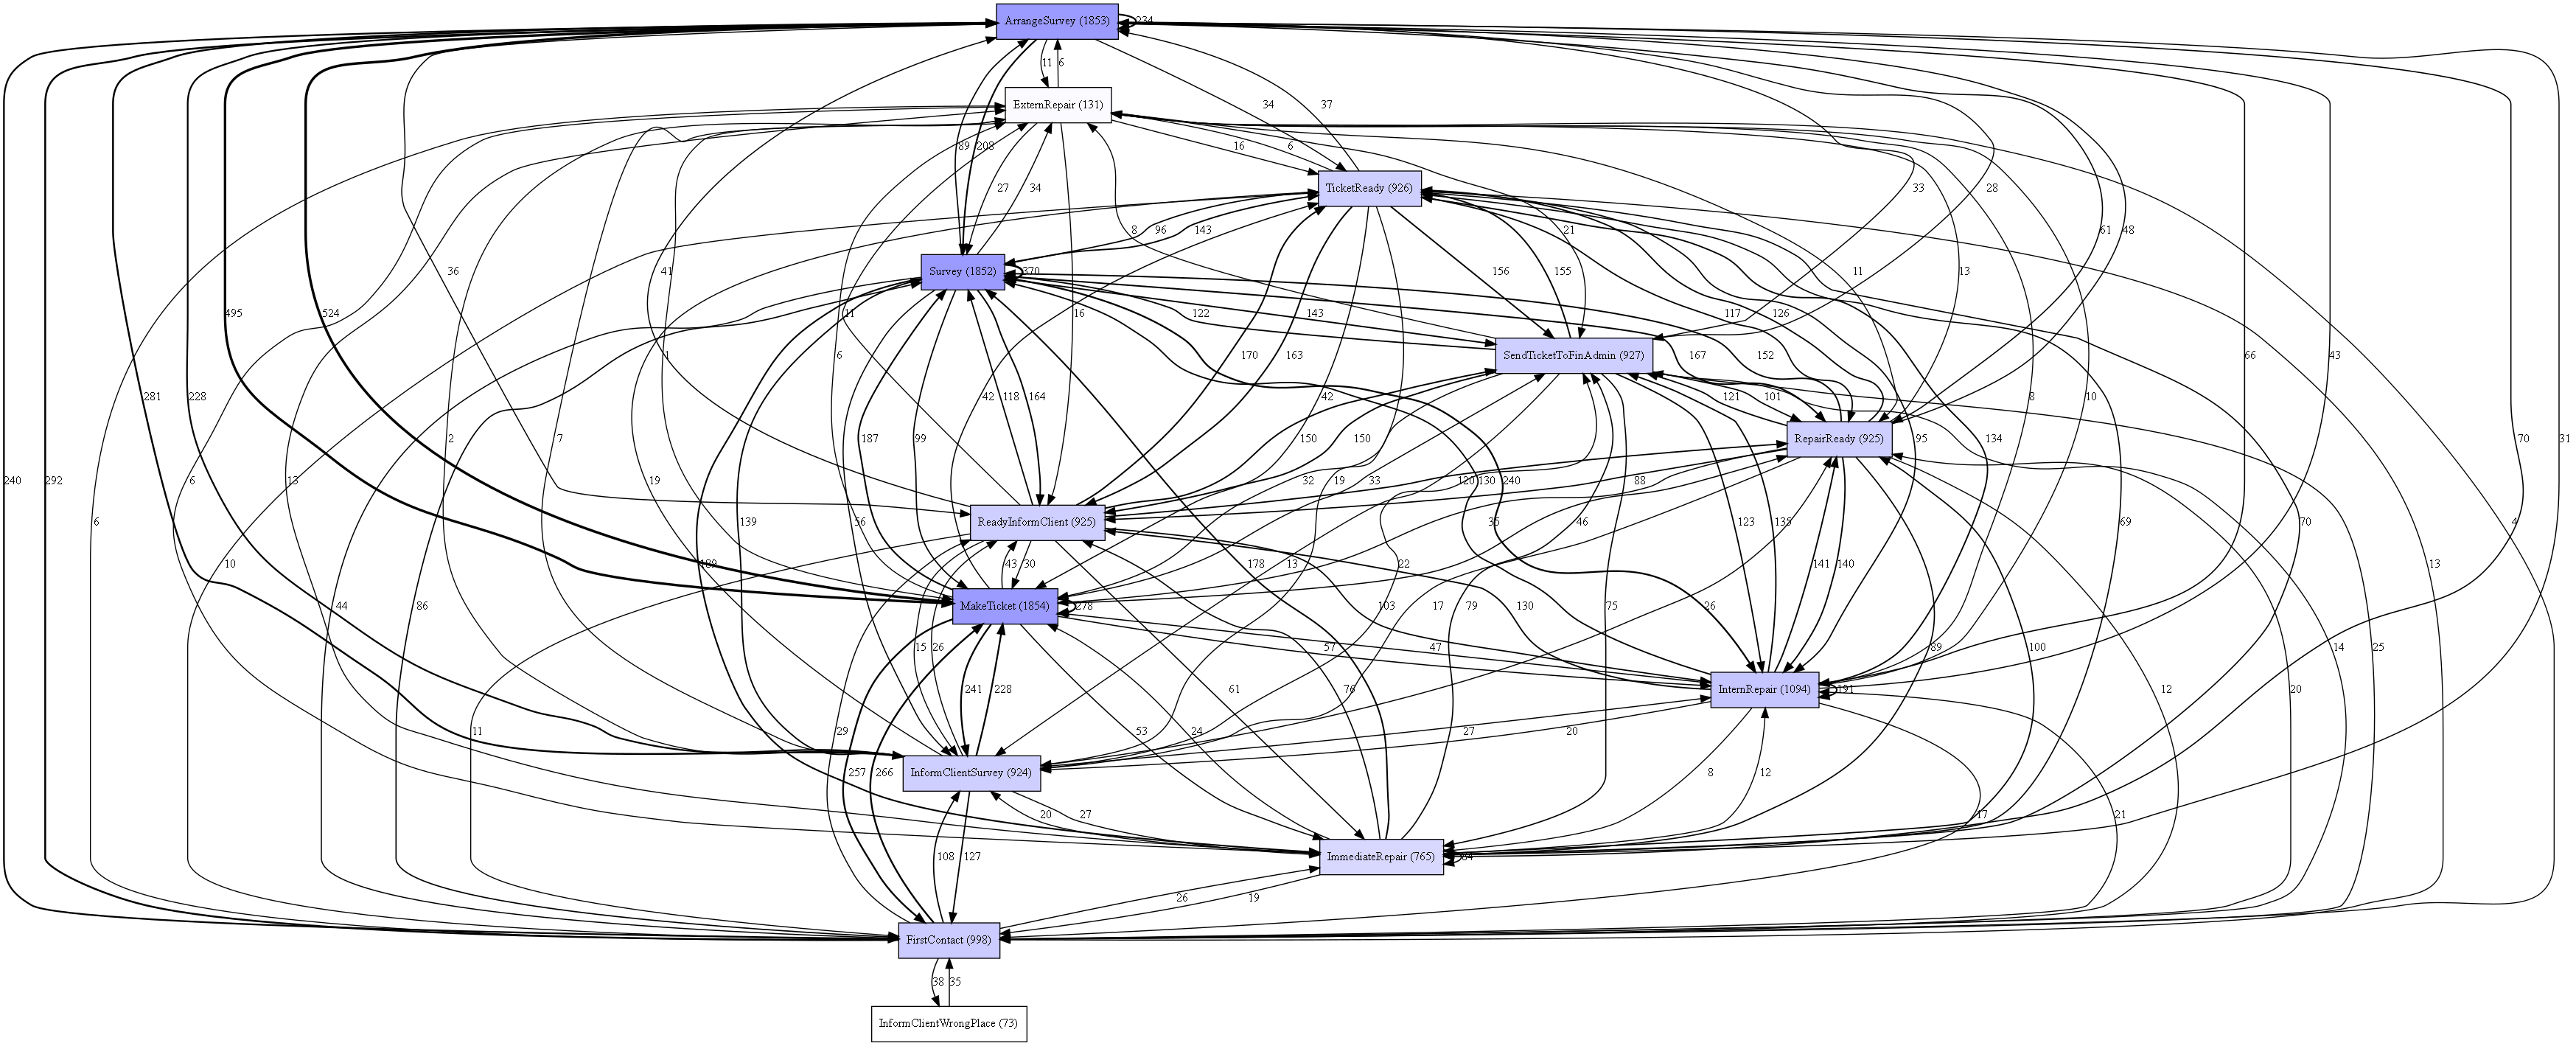

In [282]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
import pandas as pd
import pm4py

#dataframe = pd.read_csv('./repair2.csv')
#dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
#dataframe = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID', start_timestamp_key='date',timestamp_key='time')

event_log = pm4py.convert_to_event_log(tp)
dfg = dfg_discovery.apply(event_log)
gviz = dfg_visualization.apply(dfg, log=event_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

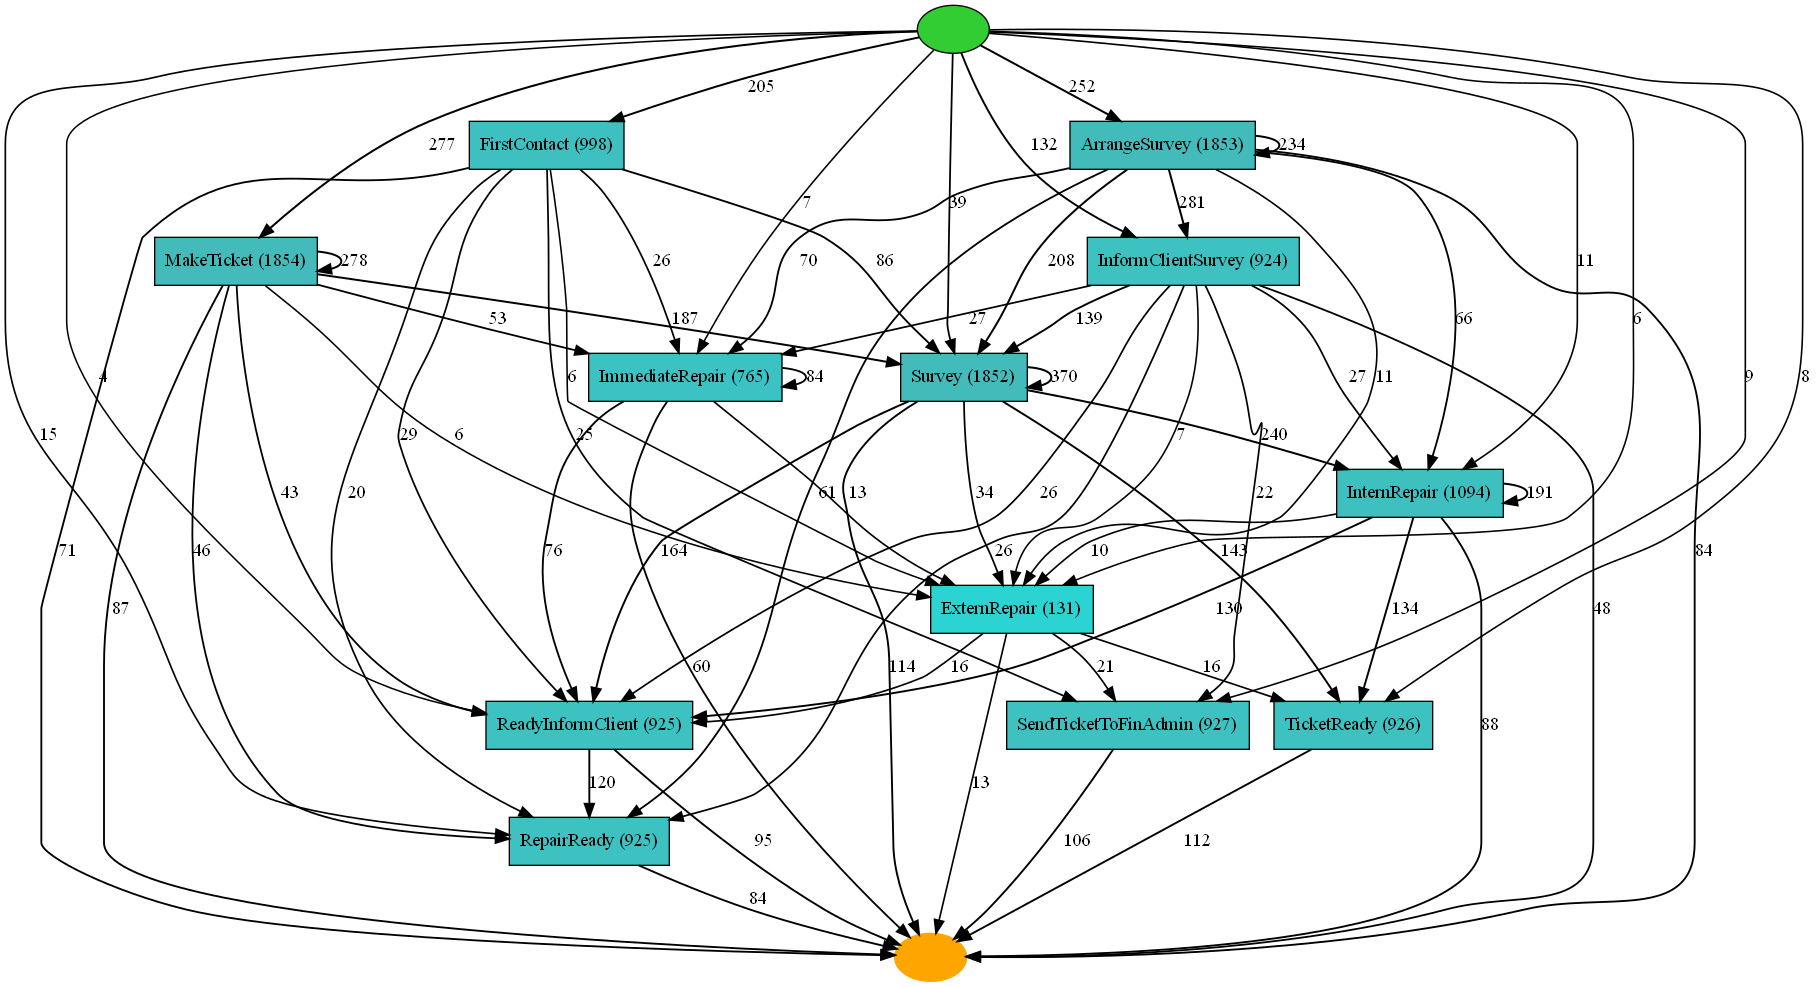

In [283]:
from pm4py.algo.discovery.heuristics import algorithm
from pm4py.visualization.heuristics_net import visualizer
#     algorithm.Variants.CLASSIC.value.Parameters.AND_MEASURE_THRESH : 0.05,
# algorithm.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH : 0.9,
# algorithm.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT : 150,
# algorithm.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH : 2,
# algorithm.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH : 0.5,
parms = {
    algorithm.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH : 0.1,
    algorithm.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT : 1,
    algorithm.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH : 2,
    algorithm.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH : 0.1,
}
heu = algorithm.apply_heu(event_log,parms)
viz = visualizer.apply(heu)
visualizer.view(viz)

In [284]:
tp.loc[:,['taskID','contact','minutes']].groupby('contact').mean()

minutes
contact             
Letter    724.430696
Personal  703.836873
Phone     719.609179
Web       708.776185
ZZ        842.407407

In [285]:
tp[tp['contact'] != 'ZZ']

caseID                taskID originator eventtype contact RepairType  \
0        1          FirstContact       Dian  complete   Phone        NaN   
1        1            MakeTicket       Dian  complete   Phone          E   
2        1         ArrangeSurvey       Dian  complete   Phone        NaN   
3        1         ArrangeSurvey       Dian     start   Phone        NaN   
4        1    InformClientSurvey     System  complete   Phone        NaN   
..     ...                   ...        ...       ...     ...        ...   
49    1000          InternRepair       John  complete     Web        NaN   
50    1000          InternRepair       John     start     Web        NaN   
51    1000     ReadyInformClient     System  complete     Web        NaN   
52    1000           TicketReady     System  complete     Web        NaN   
53    1000  SendTicketToFinAdmin     System  complete     Web        NaN   

    objectKey RepairInternally  EstimatedRepairTime  RepairCode RepairOK  \
0         NaN              NaN                  NaN         NaN      NaN   
1      1340.0              NaN                  NaN         NaN      NaN   
2         NaN              NaN                  NaN         NaN      NaN   
3         NaN              NaN                  NaN         NaN      NaN   
4         NaN              NaN                  NaN         NaN      NaN   
..        ...              ...                  ...         ...      ...   
49        NaN              NaN                  NaN         NaN      NaN   
50        NaN              NaN                  NaN         NaN      NaN   
51        NaN              NaN                  NaN         NaN     True   
52        NaN              NaN                  NaN         NaN      NaN   
53        NaN              NaN                  NaN         NaN      NaN   

                        date                      time  minutes  \
0  1905-05-23 00:00:00+00:00 2022-09-13 00:00:00+00:00        0   
1  1970-01-02 00:00:00+00:00 2022-09-13 08:11:00+00:00      491   
2  1970-01-02 00:00:00+00:00 2022-09-13 08:16:00+00:00      496   
3  1970-01-02 00:00:00+00:00 2022-09-13 08:11:00+00:00      491   
4  1970-01-02 00:00:00+00:00 2022-09-13 08:16:00+00:00      496   
..                       ...                       ...      ...   
49 1970-01-19 00:00:00+00:00 2022-09-13 18:34:00+00:00     1114   
50 1970-01-19 00:00:00+00:00 2022-09-13 14:34:00+00:00      874   
51 1970-01-20 00:00:00+00:00 2022-09-13 02:25:00+00:00      145   
52 1970-01-20 00:00:00+00:00 2022-09-13 02:25:00+00:00      145   
53 2022-01-23 00:00:00+00:00 2022-09-13 01:11:00+00:00       71   

   case:concept:name          concept:name            time:timestamp  @@index  
0                  1          FirstContact 1905-05-23 00:00:00+00:00        0  
1                  1            MakeTicket 1970-01-02 00:00:00+00:00        1  
2                  1         ArrangeSurvey 1970-01-02 00:00:00+00:00        2  
3                  1         ArrangeSurvey 1970-01-02 00:00:00+00:00        3  
4                  1    InformClientSurvey 1970-01-02 00:00:00+00:00        4  
..               ...                   ...                       ...      ...  
49              1000          InternRepair 1970-01-19 00:00:00+00:00       49  
50              1000          InternRepair 1970-01-19 00:00:00+00:00       50  
51              1000     ReadyInformClient 1970-01-20 00:00:00+00:00       51  
52              1000           TicketReady 1970-01-20 00:00:00+00:00       52  
53              1000  SendTicketToFinAdmin 2022-01-23 00:00:00+00:00       53  

[13220 rows x 18 columns]

- 처리시간이 짧은 100개 서브케이스 뽑아보기